# Data Dictionary 
* 'PERIOD_START_TIME' - 15 minutes interval data coming from KPI
* 'SPECTRUM' - Frquency Band
* 'REGION' - South North East West 
* 'MARKET' - Place where the site is located
* 'TAC' - Unique for the site tracking area code
* 'SITE' - Site is site ID which cover a radious of 5 to 10 km. naming of the coverage area. 
* 'ENODEB' - In a site 2 to 3 Base station\ base band (a baseband has 6 to 9 radios) units and EnodeB id 
* 'SECTOR' - Sector includes Alpha, beta and gamma directions. RADIO\ sector may have multiple radio type of cells 
* 'CELL' - Cell is coverage area with capacity (1900,2100\aws,850,2300\wcs) and coverage (600,700,f_net\emergency) in multiple spectrum\ bands. carrier_no can identify cell type 
* 'Avg Nr RRC Connected Users' - average Neighbour radio resource control connected users
* 'Downlink PRB Utilization' - phisical resource block utilization (related to capacity). amount of data capacity of a cell
* 'VoLTE Drop Rate (%)' - voice over lte call drop rate (handover failure)
* 'ERAB Drop Rate eNodeB (%)' - 
* 'ERAB Drops eNodeB' - user equipment drop ERAB conncetion between devices and the site
* 'ERAB Initial Access Failure Rate (%)' -
* 'ERAB Initial Access Failures (c)' - Hardware or software failure (dialing takes a lot of time beeps)
* 'RRC Failures' - radio resource control failure for eg handover failure 
* 'RRC Failure Rate (%)' - radio resource control failure rate


## Region> market> site> enodeb> spectrum> sector> cell

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from IPython import display
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set display options for better visualization
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', 50)       # Limit number of rows
pd.set_option('display.precision', 3)       # Limit decimal places

# Set matplotlib parameters
plt.rcParams['figure.figsize'] = (12, 6)    # Figure size
plt.rcParams['font.size'] = 11              # Base font size
plt.rcParams['axes.labelsize'] = 10         # Axis labels
plt.rcParams['xtick.labelsize'] = 9         # X-axis tick labels
plt.rcParams['ytick.labelsize'] = 9         # Y-axis tick labels
plt.rcParams['legend.fontsize'] = 10        # Legend font size
plt.style.use('seaborn-v0_8-darkgrid')     # Use seaborn style for better readability


In [3]:
# Set IPython notebook display options
from IPython.display import display, HTML
display(HTML("""
<style>
    table {font-size: 11px !important;}
    .rendered_html {font-size: 11px !important;}
    .output_area {font-size: 11px !important;}
    .container { width:100% !important; }
</style>
"""))

In [5]:
# Get the project root directory and create path (1 level up)
project_root = os.path.dirname(os.getcwd())
csv_path = os.path.join(project_root,'tes', 'docs', 'KPI.csv')

# Check if file exists first
if os.path.exists(csv_path):
    print(f"Reading file from: {csv_path}")
    # Read CSV with second row as header
    df = pd.read_csv(csv_path, header=1)
    
    # Display column names and first few rows
    print("Column Headers:")
    print(df.columns.tolist())
    print(f"\nData shape: {df.shape}")
    #print(df.head())
else:
    print(f"✗ File not found at: {csv_path}")

Reading file from: c:\Users\287937\Desktop\tes\docs\KPI.csv
Column Headers:
['PERIOD_START_TIME', 'SPECTRUM', 'REGION', 'MARKET', 'TAC', 'SITE', 'ENODEB', 'SECTOR', 'CELL', 'Avg Nr RRC Connected Users', 'Downlink PRB Utilization', 'VoLTE Drop Rate (%)', 'ERAB Drop Rate eNodeB (%)', 'ERAB Drops eNodeB', 'ERAB Initial Access Failure Rate (%)', 'ERAB Initial Access Failures (c)', 'RRC Failures', 'RRC Failure Rate (%)']

Data shape: (110904, 18)


In [6]:
display(df.sample(5))
display(df.tail())

,PERIOD_START_TIME,SPECTRUM,REGION,MARKET,TAC,SITE,ENODEB,SECTOR,CELL,Avg Nr RRC Connected Users,Downlink PRB Utilization,VoLTE Drop Rate (%),ERAB Drop Rate eNodeB (%),ERAB Drops eNodeB,ERAB Initial Access Failure Rate (%),ERAB Initial Access Failures (c),RRC Failures,RRC Failure Rate (%)
11319,08/25/2025 10:30,AWS,South,TRV,7715360,TRVLA84947A,TRVMLA84947A,TRVLA84947A2,TRVLLA84947A21,41.817,22.19,0.0,0.000,0,0.339,5,0,0.0
851,08/24/2025 12:45,PCS,South,TRV,7715360,TRVIE04376A,TRVMIE04376A,TRVIE04376A1,TRVBIE04376A11,5.961,7.08,0.0,0.000,0,0.000,0,0,0.0
49200,08/28/2025 17:45,600,South,TRV,7715360,TRVLA84947A,TRVMLA84947A,TRVLA84947A1,TRVELA84947A11,0.039,3.45,0.0,0.000,0,0.000,0,0,0.0
35170,08/27/2025 12:30,600,South,TRV,7715360,TRVIE04999C,TRVMIE04999C,TRVIE04999C3,TRVEIE04999C31,1.817,13.22,0.0,2.062,2,0.000,0,0,0.0
18947,08/26/2025 02:15,PCS,South,TRV,7715360,TRVIE04310A,TRVMIE04310A3,TRVIE04310A3,TRVBIE04310A31,0.000,0.00,0.0,0.000,0,0.000,0,0,0.0


,PERIOD_START_TIME,SPECTRUM,REGION,MARKET,TAC,SITE,ENODEB,SECTOR,CELL,Avg Nr RRC Connected Users,Downlink PRB Utilization,VoLTE Drop Rate (%),ERAB Drop Rate eNodeB (%),ERAB Drops eNodeB,ERAB Initial Access Failure Rate (%),ERAB Initial Access Failures (c),RRC Failures,RRC Failure Rate (%)
110899,09-03-2025 08:15,600,South,TRV,7715360,TRVIE05356C,TRVMIE05356C,TRVIE05356C3,TRVEIE05356C31,15.467,41.75,0.0,0.817,6,2.616,25,2,0.21
110900,09-03-2025 08:15,700,South,TRV,7715360,TRVIE04624A,TRVMIE04624A,TRVIE04624A3,TRVDIE04624A31,0.878,9.16,0.0,0.280,1,0.713,3,1,0.17
110901,09-03-2025 08:15,700,South,TRV,7715360,TRVIE04310A,TRVMIE04310A,TRVIE04310A1,TRVDIE04310A11,2.128,12.32,0.0,1.348,5,0.000,0,0,0.00
110902,09-03-2025 08:15,PCS,South,TRV,7715360,TRVLA94091A,TRVMLA94091A,TRVLA94091A3,TRVBLA94091A31,11.106,18.71,0.0,0.000,0,0.000,0,0,0.00
110903,09-03-2025 08:15,700,South,TRV,7715360,TRVIE04376A,TRVMIE04376A,TRVIE04376A1,TRVDIE04376A11,0.428,4.95,0.0,5.435,5,0.000,0,0,0.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110904 entries, 0 to 110903
Data columns (total 18 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   PERIOD_START_TIME                     110904 non-null  object 
 1   SPECTRUM                              110904 non-null  object 
 2   REGION                                110904 non-null  object 
 3   MARKET                                110904 non-null  object 
 4   TAC                                   110904 non-null  int64  
 5   SITE                                  110904 non-null  object 
 6   ENODEB                                110904 non-null  object 
 7   SECTOR                                110904 non-null  object 
 8   CELL                                  110904 non-null  object 
 9   Avg Nr RRC Connected Users            110904 non-null  float64
 10  Downlink PRB Utilization              110904 non-null  float64
 11  

In [8]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PERIOD_START_TIME,110904,950,08/31/2025 21:00,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SPECTRUM,110904,4,600,27789,NaN,NaN,NaN,NaN,NaN,NaN,NaN
REGION,110904,1,South,110904,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MARKET,110904,1,TRV,110904,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TAC,110904.0,NaN,NaN,NaN,7715360.0,0.0,7715360.0,7715360.0,7715360.0,7715360.0,7715360.0
SITE,110904,10,TRVIE04624A,11400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENODEB,110904,17,TRVMLA94091A,11400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SECTOR,110904,30,TRVIE04624A2,3800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CELL,110904,120,TRVEIE04624A21,950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avg Nr RRC Connected Users,110904.0,NaN,NaN,NaN,12.109,21.406,0.0,0.622,3.117,14.606,264.467


In [9]:
df.columns

Index(['PERIOD_START_TIME', 'SPECTRUM', 'REGION', 'MARKET', 'TAC', 'SITE',
       'ENODEB', 'SECTOR', 'CELL', 'Avg Nr RRC Connected Users',
       'Downlink PRB Utilization', 'VoLTE Drop Rate (%)',
       'ERAB Drop Rate eNodeB (%)', 'ERAB Drops eNodeB',
       'ERAB Initial Access Failure Rate (%)',
       'ERAB Initial Access Failures (c)', 'RRC Failures',
       'RRC Failure Rate (%)'],
      dtype='object')

In [10]:
df.drop(['REGION', 'MARKET', 'TAC'],axis=1,inplace=True) 
# dropping the columns which are not required for the analysis

In [11]:
df["PRB_Util_Threshold"] = (df['Downlink PRB Utilization'] < 20)

In [12]:
df['Downlink PRB Utilization'].describe()

count    110904.000
mean         12.410
std          15.155
min           0.000
25%           3.870
50%           6.490
75%          14.730
max          99.240
Name: Downlink PRB Utilization, dtype: float64

In [13]:
df.head(10)

,PERIOD_START_TIME,SPECTRUM,SITE,ENODEB,SECTOR,CELL,Avg Nr RRC Connected Users,Downlink PRB Utilization,VoLTE Drop Rate (%),ERAB Drop Rate eNodeB (%),ERAB Drops eNodeB,ERAB Initial Access Failure Rate (%),ERAB Initial Access Failures (c),RRC Failures,RRC Failure Rate (%),PRB_Util_Threshold
0,08/24/2025 11:00,600,TRVIE04624A,TRVMIE04624A,TRVIE04624A2,TRVEIE04624A21,0.411,7.09,0.0,0.000,0,0.00,0,0,0.0,True
1,08/24/2025 11:00,PCS,TRVLA94091A,TRVMLA94091A,TRVLA94091A1,TRVBLA94091A11,57.261,49.19,0.0,0.000,0,0.00,0,0,0.0,False
2,08/24/2025 11:00,AWS,TRVIE04923A,TRVMIE04923A3,TRVIE04923A2,TRVLIE04923A21,9.628,1.98,0.0,0.192,1,0.00,0,0,0.0,True
3,08/24/2025 11:00,AWS,TRVIE04376A,TRVMIE04376A,TRVIE04376A1,TRVLIE04376A11,10.106,2.21,0.0,0.000,0,0.00,0,0,0.0,True
4,08/24/2025 11:00,AWS,TRVIE04376A,TRVMIE04376A,TRVIE04376A3,TRVLIE04376A31,2.539,1.62,0.0,0.000,0,0.00,0,0,0.0,True
5,08/24/2025 11:00,600,TRVIE05356C,TRVMIE05356C,TRVIE05356C2,TRVEIE05356C21,0.250,3.98,0.0,0.000,0,0.00,0,0,0.0,True
6,08/24/2025 11:00,PCS,TRVIE04498A,TRVMIE04498A3,TRVIE04498A2,TRVBIE04498A21,30.228,23.59,0.0,0.000,0,0.00,0,0,0.0,False
7,08/24/2025 11:00,PCS,TRVIE04999C,TRVMIE04999C2,TRVIE04999C2,TRVBIE04999C21,17.111,14.69,0.0,0.312,3,0.22,2,0,0.0,True
8,08/24/2025 11:00,600,TRVIE04310A,TRVMIE04310A,TRVIE04310A3,TRVEIE04310A31,6.294,10.36,0.0,0.000,0,0.00,0,0,0.0,True
9,08/24/2025 11:00,700,TRVLA84947A,TRVMLA84947A,TRVLA84947A1,TRVDLA84947A11,0.150,3.56,0.0,0.000,0,0.00,0,0,0.0,True


In [14]:
df.rename(columns={'ENODEB':'GNODEB'}, inplace=True)
# this is 5g data so enodeb is gnodeb

In [15]:
print(df.CELL.unique()[:10])
print(df.CELL.nunique())
#950/96

['TRVEIE04624A21' 'TRVBLA94091A11' 'TRVLIE04923A21' 'TRVLIE04376A11'
 'TRVLIE04376A31' 'TRVEIE05356C21' 'TRVBIE04498A21' 'TRVBIE04999C21'
 'TRVEIE04310A31' 'TRVDLA84947A11']
120


In [16]:
for col in df.drop('PERIOD_START_TIME',axis=1).columns:
    if df[col].dtype == 'object':
        print("Column Name :",col.title()," ","Unique Values: ",df[col].nunique())
        print(df[col].value_counts())
        print("\n")

Column Name : Spectrum   Unique Values:  4
SPECTRUM
600    27789
700    27789
PCS    27663
AWS    27663
Name: count, dtype: int64


Column Name : Site   Unique Values:  10
SITE
TRVIE04624A    11400
TRVLA94091A    11400
TRVIE04376A    11400
TRVIE04498A    11400
TRVLA84947A    11400
TRVIE04310A    11400
TRVIE05339B    11400
TRVIE04999C    11388
TRVIE05356C    11148
TRVIE04923A     8568
Name: count, dtype: int64


Column Name : Gnodeb   Unique Values:  17
GNODEB
TRVMLA94091A     11400
TRVMLA84947A     11400
TRVMIE04376A     11400
TRVMIE04624A      5700
TRVMIE05356C      5700
TRVMIE04310A      5700
TRVMIE04498A3     5700
TRVMIE04624A3     5700
TRVMIE05339B      5700
TRVMIE04498A      5700
TRVMIE05339B3     5700
TRVMIE04310A3     5700
TRVMIE04999C2     5694
TRVMIE04999C      5694
TRVMIE05356C3     5448
TRVMIE04923A3     4284
TRVMIE04923A      4284
Name: count, dtype: int64


Column Name : Sector   Unique Values:  30
SECTOR
TRVIE04624A2    3800
TRVLA94091A1    3800
TRVIE04376A1    3800
TRVIE

In [17]:
for col in df.drop('PERIOD_START_TIME',axis=1).columns:
    if df[col].dtype == 'object':
        print(f"Column Name : {col.title()},  Unique Values: {df[col].nunique()}")
        print("\n")

Column Name : Spectrum,  Unique Values: 4


Column Name : Site,  Unique Values: 10


Column Name : Gnodeb,  Unique Values: 17


Column Name : Sector,  Unique Values: 30


Column Name : Cell,  Unique Values: 120




In [18]:
display(df.groupby(['SITE', 'GNODEB', 'SPECTRUM', 'SECTOR', 'CELL'])['Downlink PRB Utilization'].mean().to_frame().iloc[0:48,:])

Downlink PRB Utilization
SITE        GNODEB        SPECTRUM SECTOR       CELL                                    
TRVIE04310A TRVMIE04310A  600      TRVIE04310A1 TRVEIE04310A11                    17.746
                                   TRVIE04310A2 TRVEIE04310A21                    11.463
                                   TRVIE04310A3 TRVEIE04310A31                    22.216
                          700      TRVIE04310A1 TRVDIE04310A11                     8.521
                                   TRVIE04310A2 TRVDIE04310A21                     8.779
                                   TRVIE04310A3 TRVDIE04310A31                    14.687
            TRVMIE04310A3 AWS      TRVIE04310A1 TRVLIE04310A11                     6.736
                                   TRVIE04310A2 TRVLIE04310A21                    11.334
                                   TRVIE04310A3 TRVLIE04310A31                     8.147
                          PCS      TRVIE04310A1 TRVBIE04310A11                     4.441
                                   TRVIE04310A2 TRVBIE04310A21                     8.769
                                   TRVIE04310A3 TRVBIE04310A31                     8.300
TRVIE04376A TRVMIE04376A  600      TRVIE04376A1 TRVEIE04376A11                     4.243
                                   TRVIE04376A2 TRVEIE04376A21                     8.717
                                   TRVIE04376A3 TRVEIE04376A31                     4.043
                          700      TRVIE04376A1 TRVDIE04376A11                     6.124
                                   TRVIE04376A2 TRVDIE04376A21                    11.391
                                   TRVIE04376A3 TRVDIE04376A31                     4.761
                          AWS      TRVIE04376A1 TRVLIE04376A11                     4.125
                                   TRVIE04376A2 TRVLIE04376A21                    18.004
                                   TRVIE04376A3 TRVLIE04376A31                     2.296
                          PCS      TRVIE04376A1 TRVBIE04376A11                     3.810
                                   TRVIE04376A2 TRVBIE04376A21                    11.150
                                   TRVIE04376A3 TRVBIE04376A31                     3.094
TRVIE04498A TRVMIE04498A  600      TRVIE04498A1 TRVEIE04498A11                     9.164
                                   TRVIE04498A2 TRVEIE04498A21                     5.707
                                   TRVIE04498A3 TRVEIE04498A31                    11.846
                          700      TRVIE04498A1 TRVDIE04498A11                     8.436
                                   TRVIE04498A2 TRVDIE04498A21                     4.868
                                   TRVIE04498A3 TRVDIE04498A31                    10.179
            TRVMIE04498A3 AWS      TRVIE04498A1 TRVLIE04498A11                    18.483
                                   TRVIE04498A2 TRVLIE04498A21                    15.398
                                   TRVIE04498A3 TRVLIE04498A31                    42.736
                          PCS      TRVIE04498A1 TRVBIE04498A11                    17.696
                                   TRVIE04498A2 TRVBIE04498A21                    13.079
                                   TRVIE04498A3 TRVBIE04498A31                    51.125
TRVIE04624A TRVMIE04624A  600      TRVIE04624A1 TRVEIE04624A11                    11.790
                                   TRVIE04624A2 TRVEIE04624A21                     9.782
                                   TRVIE04624A3 TRVEIE04624A31                    12.292
                          700      TRVIE04624A1 TRVDIE04624A11                    30.998
                                   TRVIE04624A2 TRVDIE04624A21                     6.053
                                   TRVIE04624A3 TRVDIE04624A31                     7.574
            TRVMIE04624A3 AWS      TRVIE04624A1 TRVLIE04624A11                    17.776
                                   TRVIE04624A2 TRVLIE04624

In [19]:
display(df.groupby(['SITE', 'GNODEB', 'SPECTRUM', 'SECTOR', 'CELL']).size().head(24))

SITE         GNODEB         SPECTRUM  SECTOR        CELL          
TRVIE04310A  TRVMIE04310A   600       TRVIE04310A1  TRVEIE04310A11    950
                                      TRVIE04310A2  TRVEIE04310A21    950
                                      TRVIE04310A3  TRVEIE04310A31    950
                            700       TRVIE04310A1  TRVDIE04310A11    950
                                      TRVIE04310A2  TRVDIE04310A21    950
                                      TRVIE04310A3  TRVDIE04310A31    950
             TRVMIE04310A3  AWS       TRVIE04310A1  TRVLIE04310A11    950
                                      TRVIE04310A2  TRVLIE04310A21    950
                                      TRVIE04310A3  TRVLIE04310A31    950
                            PCS       TRVIE04310A1  TRVBIE04310A11    950
                                      TRVIE04310A2  TRVBIE04310A21    950
                                      TRVIE04310A3  TRVBIE04310A31    950
TRVIE04376A  TRVMIE04376A   600       TRVIE04

logic: last digit under sector section (1,2,3) are the direction alpha, beta, gamma and under a site if any one
of these is absent then cell can not be switched off

In [20]:
# display(df.groupby(['SITE', 'GNODEB', 'SPECTRUM', 'SECTOR','CELL'])['Downlink PRB Utilization'].mean().to_frame().iloc[48:96,:])

In [21]:
# display(df.groupby(['SITE', 'GNODEB', 'SPECTRUM', 'SECTOR','CELL'])['Downlink PRB Utilization'].mean().to_frame().iloc[96:,:])

* logic1: spectrum 600, 700 are coverage and all other are capacity. 
* logic2: check for last digit{1,2,3} in SECTOR weather all the SPECTRUM has 3 directions and if not then provide the eligible cells (remove these cells as condidate for switch off)

In [22]:
# Adding cell type based on spectrum type 

df["CELL_TYPE"] = pd.Series(np.where(df['SPECTRUM'].str.contains('600|700', na=False), 'coverage', 'capacity'))
#df['SPECTRUM'].apply(lambda x: 'coverage' if ('600' in str(x) or '700' in str(x)) else 'capacity')

In [23]:
display(df.groupby(['SITE', 'GNODEB', 'SPECTRUM', 'SECTOR', 'CELL','CELL_TYPE'])['Downlink PRB Utilization'].mean().to_frame().iloc[0:10,:])

Downlink PRB Utilization
SITE        GNODEB        SPECTRUM SECTOR       CELL           CELL_TYPE                          
TRVIE04310A TRVMIE04310A  600      TRVIE04310A1 TRVEIE04310A11 coverage                     17.746
                                   TRVIE04310A2 TRVEIE04310A21 coverage                     11.463
                                   TRVIE04310A3 TRVEIE04310A31 coverage                     22.216
                          700      TRVIE04310A1 TRVDIE04310A11 coverage                      8.521
                                   TRVIE04310A2 TRVDIE04310A21 coverage                      8.779
                                   TRVIE04310A3 TRVDIE04310A31 coverage                     14.687
            TRVMIE04310A3 AWS      TRVIE04310A1 TRVLIE04310A11 capacity                      6.736
                                   TRVIE04310A2 TRVLIE04310A21 capacity                     11.334
                                   TRVIE04310A3 TRVLIE04310A31 capacity                      8.147
                          PCS      TRVIE04310A1 TRVBIE04310A11 capacity                      4.441

In [24]:
def check_sector_completeness(df):
    """
    Check if all required sectors (1,2,3) are present for each SITE-SPECTRUM combination
    Returns incomplete sector configurations and their associated cells
    """
    # Create temporary series with sector numbers without modifying df
    sector_nums = df['SECTOR'].str.extract(r'(\d+)$')[0]
    
    # Group by SITE and SPECTRUM to check sector completeness
    sector_check = df.groupby(['SITE', 'SPECTRUM'])\
                    .agg({'SECTOR': lambda x: set(sector_nums[x.index])})
    required_sectors = {'1', '2', '3'}
    
    # Find incomplete configurations
    incomplete_mask = sector_check['SECTOR'].apply(lambda x: not x.issuperset(required_sectors))
    incomplete_configs = sector_check[incomplete_mask]
    
    # Get cells for incomplete configurations
    incomplete_cells = []
    for (site, spectrum) in incomplete_configs.index:
        cells = df[
            (df['SITE'] == site) & 
            (df['SPECTRUM'] == spectrum)
        ]['CELL'].unique()
        incomplete_cells.append({
            'SITE': site,
            'SPECTRUM': spectrum,
            'Present_Sectors': sorted(incomplete_configs.loc[(site, spectrum), 'SECTOR']),
            'Missing_Sectors': sorted(required_sectors - incomplete_configs.loc[(site, spectrum), 'SECTOR']),
            'Affected_Cells': sorted(cells)
        })
    
    # Create results summary
    results = {
        'incomplete_configs': incomplete_configs,
        'incomplete_cells': pd.DataFrame(incomplete_cells)
    }
    
    # Print summary
    if len(incomplete_cells) > 0:
        print(f"Found {len(incomplete_cells)} configurations with missing sectors:")
        print("\nDetailed Results:")
        print(results['incomplete_cells'].to_string())
    else:
        print("All configurations have complete sectors (1,2,3)")
        
    return results

In [25]:
check_sector_completeness(df)

# # Run the analysis
# results = check_sector_completeness(df)

# # Access specific results if needed
# incomplete_configs = results['incomplete_configs']
# affected_cells = results['incomplete_cells']

# # Get cells for a specific site-spectrum combination
# site_cells = affected_cells[affected_cells['SITE'] == 'specific_site']

All configurations have complete sectors (1,2,3)


{'incomplete_configs': Empty DataFrame
 Columns: [SECTOR]
 Index: [],
 'incomplete_cells': Empty DataFrame
 Columns: []
 Index: []}

In [26]:
df.head()
# df['Downlink PRB Utilization'] < 20

,PERIOD_START_TIME,SPECTRUM,SITE,GNODEB,SECTOR,CELL,Avg Nr RRC Connected Users,Downlink PRB Utilization,VoLTE Drop Rate (%),ERAB Drop Rate eNodeB (%),ERAB Drops eNodeB,ERAB Initial Access Failure Rate (%),ERAB Initial Access Failures (c),RRC Failures,RRC Failure Rate (%),PRB_Util_Threshold,CELL_TYPE
0,08/24/2025 11:00,600,TRVIE04624A,TRVMIE04624A,TRVIE04624A2,TRVEIE04624A21,0.411,7.09,0.0,0.000,0,0.0,0,0,0.0,True,coverage
1,08/24/2025 11:00,PCS,TRVLA94091A,TRVMLA94091A,TRVLA94091A1,TRVBLA94091A11,57.261,49.19,0.0,0.000,0,0.0,0,0,0.0,False,capacity
2,08/24/2025 11:00,AWS,TRVIE04923A,TRVMIE04923A3,TRVIE04923A2,TRVLIE04923A21,9.628,1.98,0.0,0.192,1,0.0,0,0,0.0,True,capacity
3,08/24/2025 11:00,AWS,TRVIE04376A,TRVMIE04376A,TRVIE04376A1,TRVLIE04376A11,10.106,2.21,0.0,0.000,0,0.0,0,0,0.0,True,capacity
4,08/24/2025 11:00,AWS,TRVIE04376A,TRVMIE04376A,TRVIE04376A3,TRVLIE04376A31,2.539,1.62,0.0,0.000,0,0.0,0,0,0.0,True,capacity


# EDA

In [27]:
df.columns

Index(['PERIOD_START_TIME', 'SPECTRUM', 'SITE', 'GNODEB', 'SECTOR', 'CELL',
       'Avg Nr RRC Connected Users', 'Downlink PRB Utilization',
       'VoLTE Drop Rate (%)', 'ERAB Drop Rate eNodeB (%)', 'ERAB Drops eNodeB',
       'ERAB Initial Access Failure Rate (%)',
       'ERAB Initial Access Failures (c)', 'RRC Failures',
       'RRC Failure Rate (%)', 'PRB_Util_Threshold', 'CELL_TYPE'],
      dtype='object')

In [28]:
numeric_columns = df.select_dtypes(exclude=['object']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

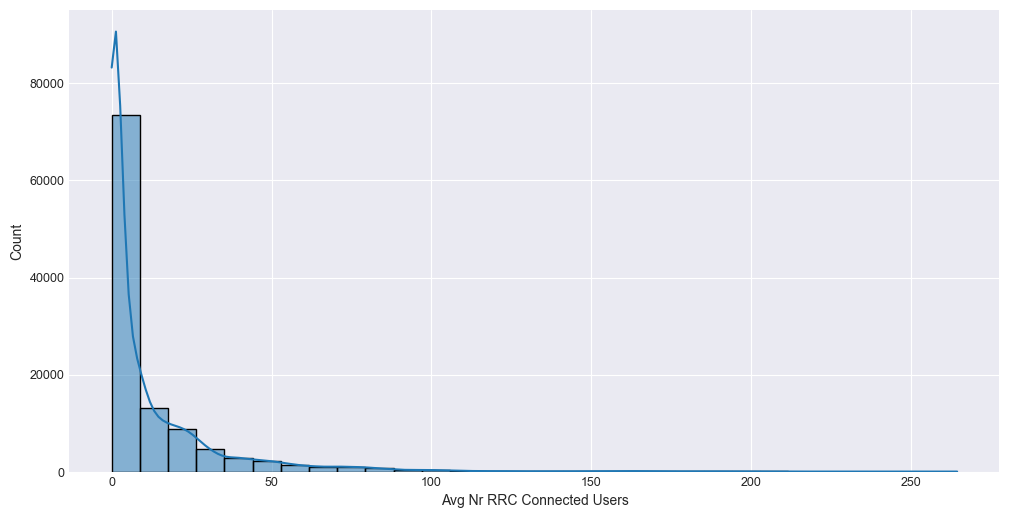

In [29]:
sns.histplot(df['Avg Nr RRC Connected Users'], kde=True, bins=30);

In [30]:
numeric_columns

['Avg Nr RRC Connected Users',
 'Downlink PRB Utilization',
 'VoLTE Drop Rate (%)',
 'ERAB Drop Rate eNodeB (%)',
 'ERAB Drops eNodeB',
 'ERAB Initial Access Failure Rate (%)',
 'ERAB Initial Access Failures (c)',
 'RRC Failures',
 'RRC Failure Rate (%)',
 'PRB_Util_Threshold']

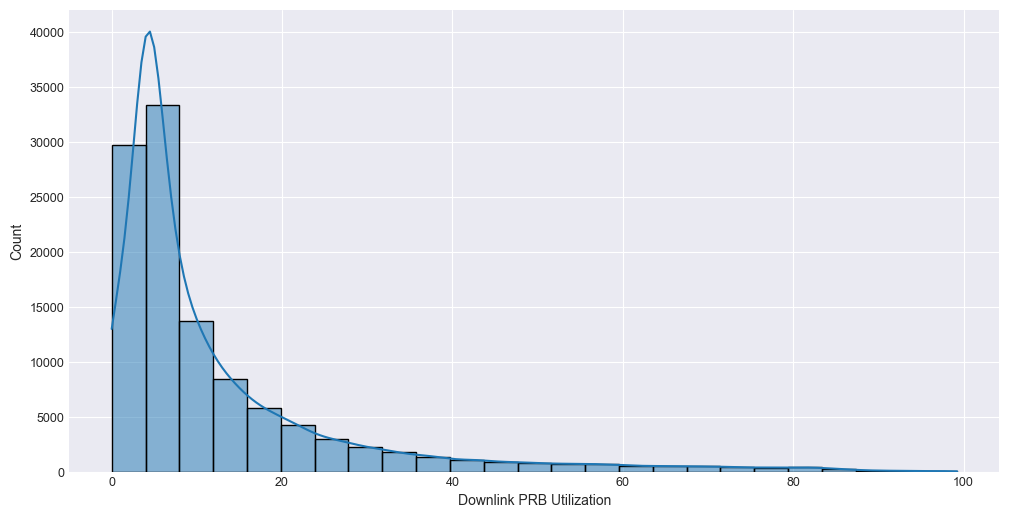

In [31]:
sns.histplot(df['Downlink PRB Utilization'], kde=True, bins=25);

In [81]:
# # Plot histograms for all numeric columns
# for col in numeric_columns[2:]:
#     print(col.upper())
#     sns.histplot(df[col], kde=True, bins=20, log_scale=True)
#     plt.show()

In [32]:
categorical_columns

['PERIOD_START_TIME',
 'SPECTRUM',
 'SITE',
 'GNODEB',
 'SECTOR',
 'CELL',
 'CELL_TYPE']

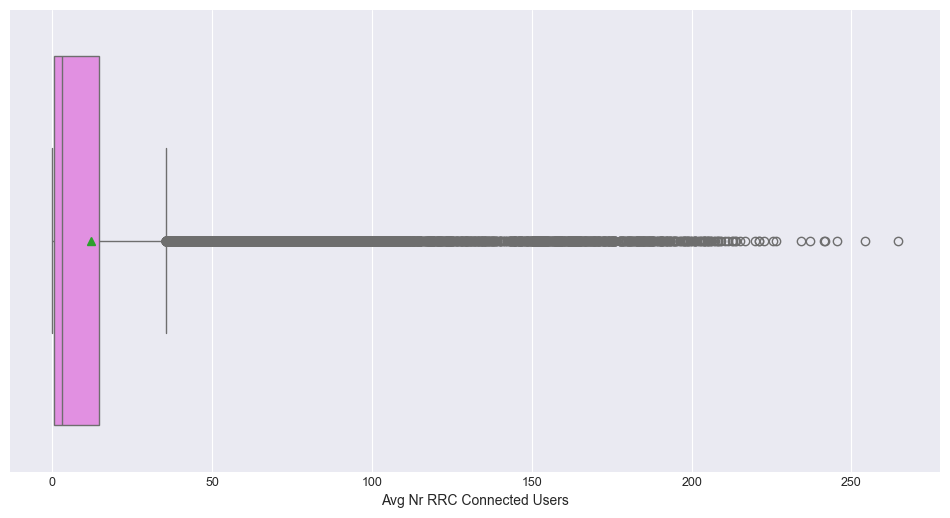

In [33]:
sns.boxplot(data = df,x='Avg Nr RRC Connected Users',orient='h',color='violet',showmeans=True);

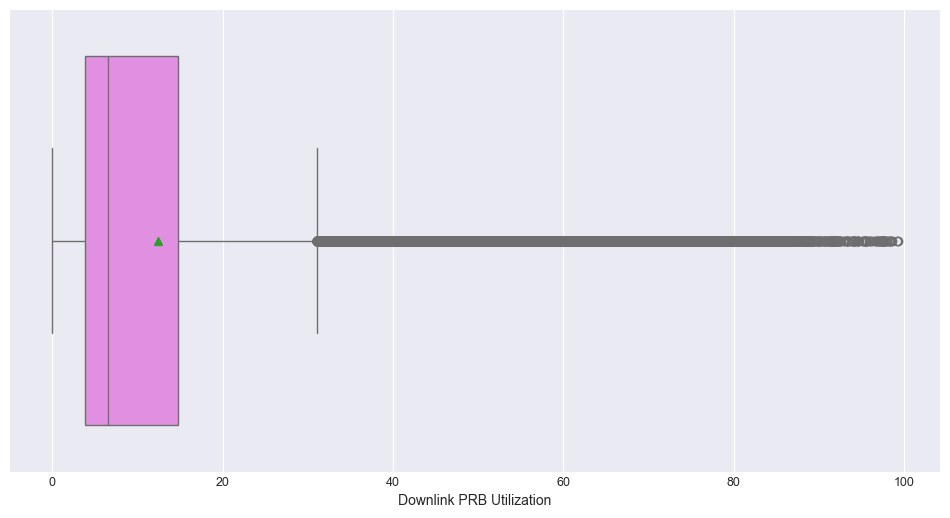

In [34]:
sns.boxplot(df['Downlink PRB Utilization'],orient='h',color='violet',showmeans=True);

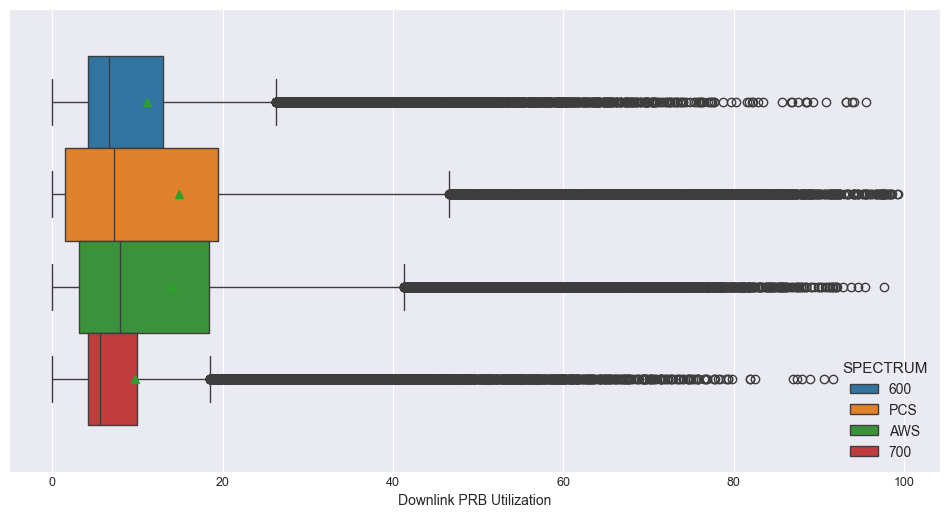

In [35]:
sns.boxplot(data=df,x = 'Downlink PRB Utilization',orient='h',hue='SPECTRUM',showmeans=True)
plt.show();

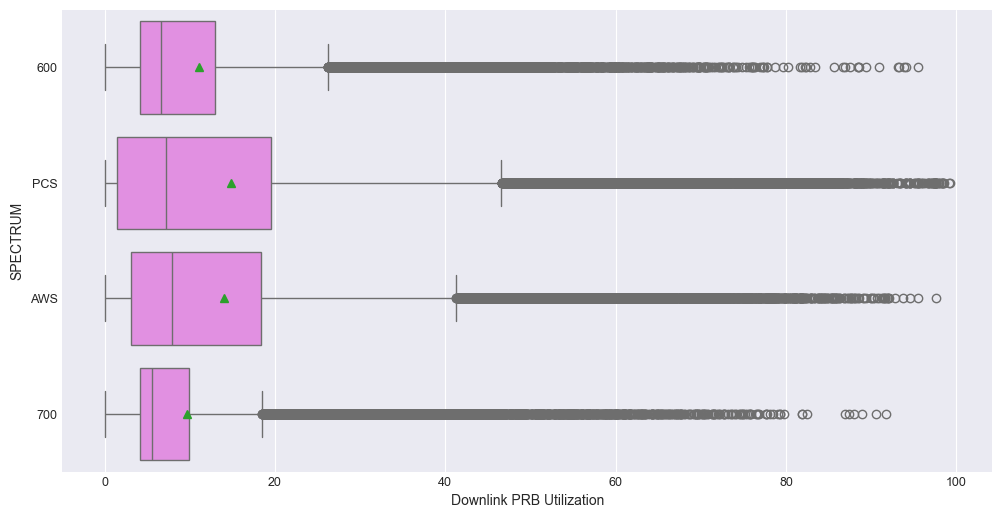

In [36]:
sns.boxplot(data=df, x ='Downlink PRB Utilization', y = 'SPECTRUM',orient='h',showmeans=True, color='violet');

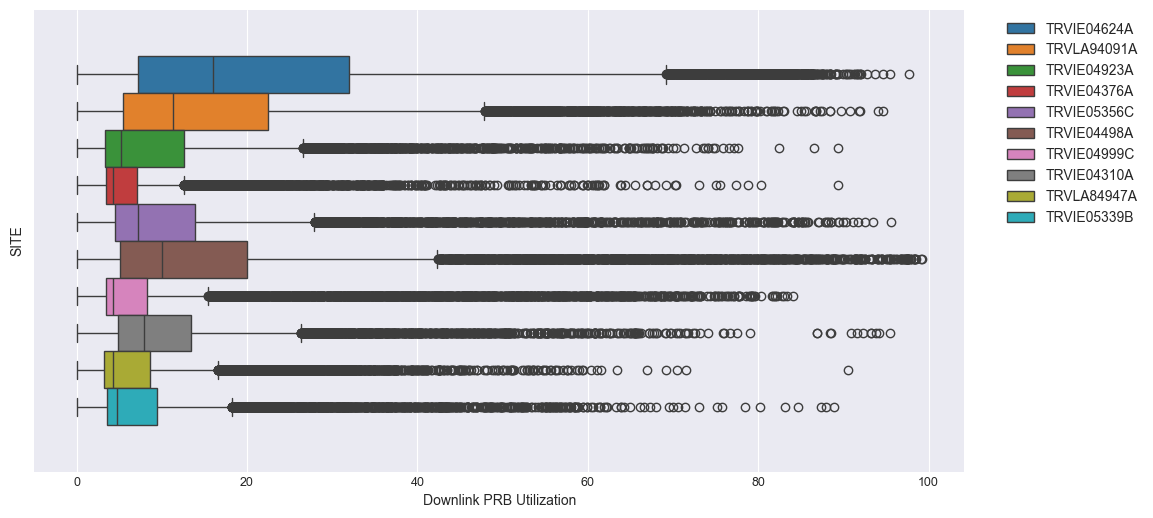

In [37]:
sns.boxplot(data=df,x = 'Downlink PRB Utilization',orient='h',hue='SITE')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.ylabel('SITE')
plt.show();

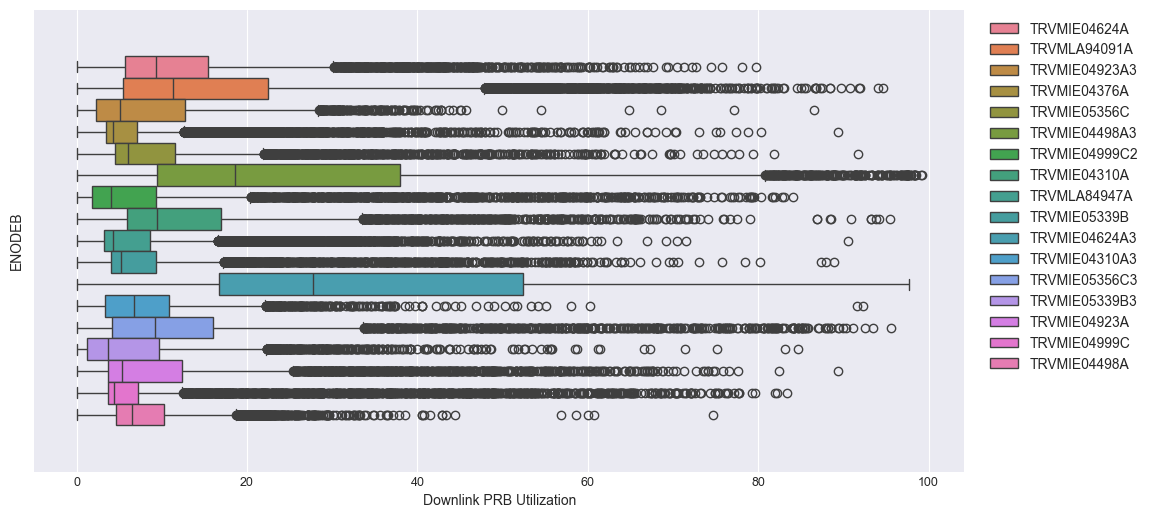

In [38]:
sns.boxplot(data=df,x = 'Downlink PRB Utilization',orient='h',hue='GNODEB')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.ylabel('ENODEB')
plt.show();

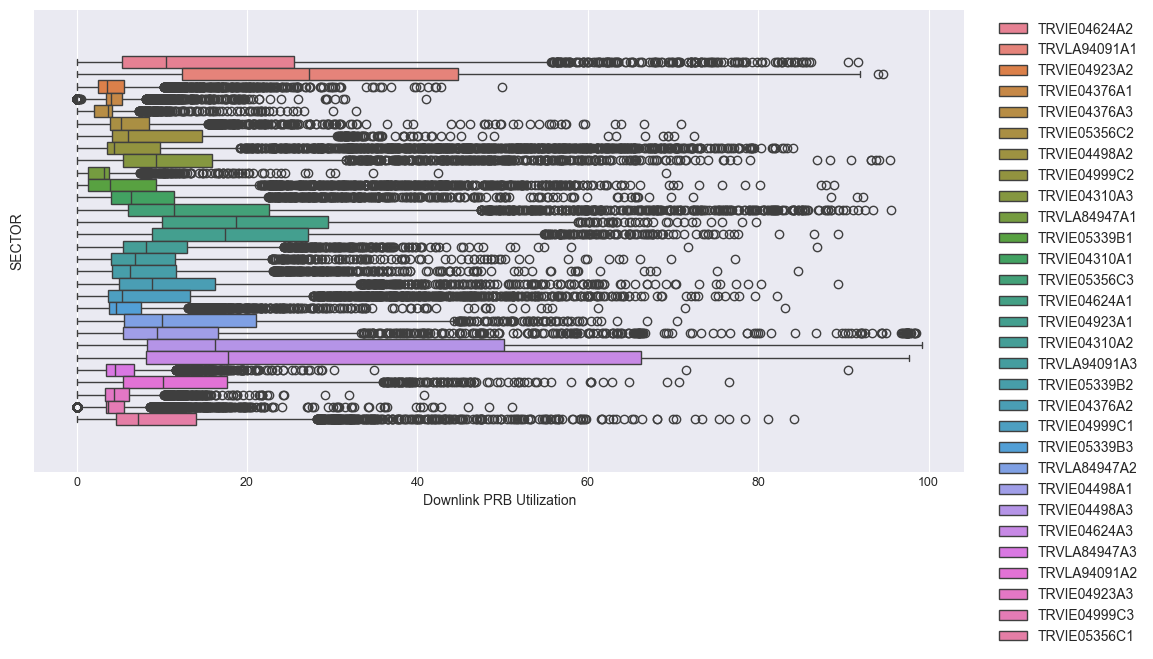

In [39]:
sns.boxplot(data=df, x ='Downlink PRB Utilization', orient='h', hue='SECTOR')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.ylabel('SECTOR')
plt.show();

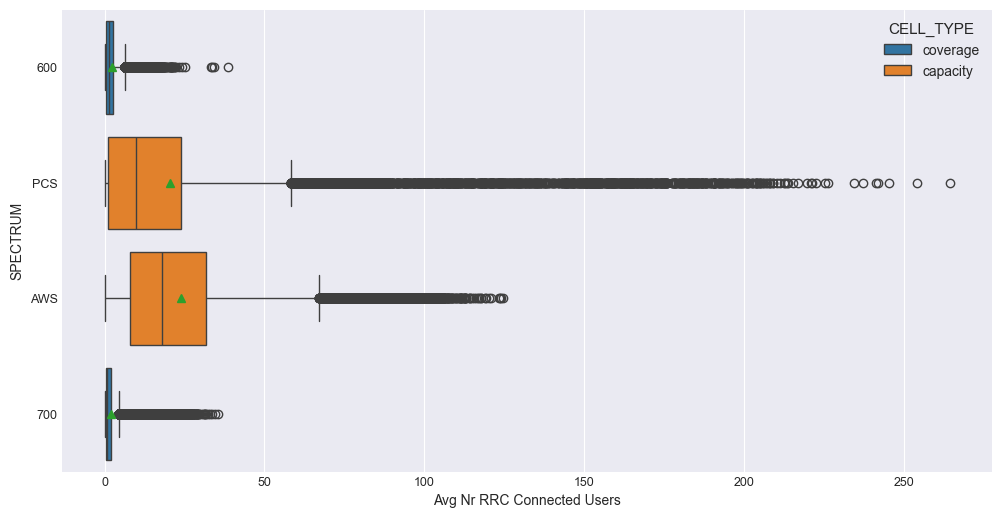

In [40]:
sns.boxplot(data=df, x ='Avg Nr RRC Connected Users', y = 'SPECTRUM',orient='h', showmeans=True, hue = 'CELL_TYPE')
plt.show();

In [41]:
#sns.boxplot(data=df,x = 'Downlink PRB Utilization',orient='h',hue='CELL');
df.columns

Index(['PERIOD_START_TIME', 'SPECTRUM', 'SITE', 'GNODEB', 'SECTOR', 'CELL',
       'Avg Nr RRC Connected Users', 'Downlink PRB Utilization',
       'VoLTE Drop Rate (%)', 'ERAB Drop Rate eNodeB (%)', 'ERAB Drops eNodeB',
       'ERAB Initial Access Failure Rate (%)',
       'ERAB Initial Access Failures (c)', 'RRC Failures',
       'RRC Failure Rate (%)', 'PRB_Util_Threshold', 'CELL_TYPE'],
      dtype='object')

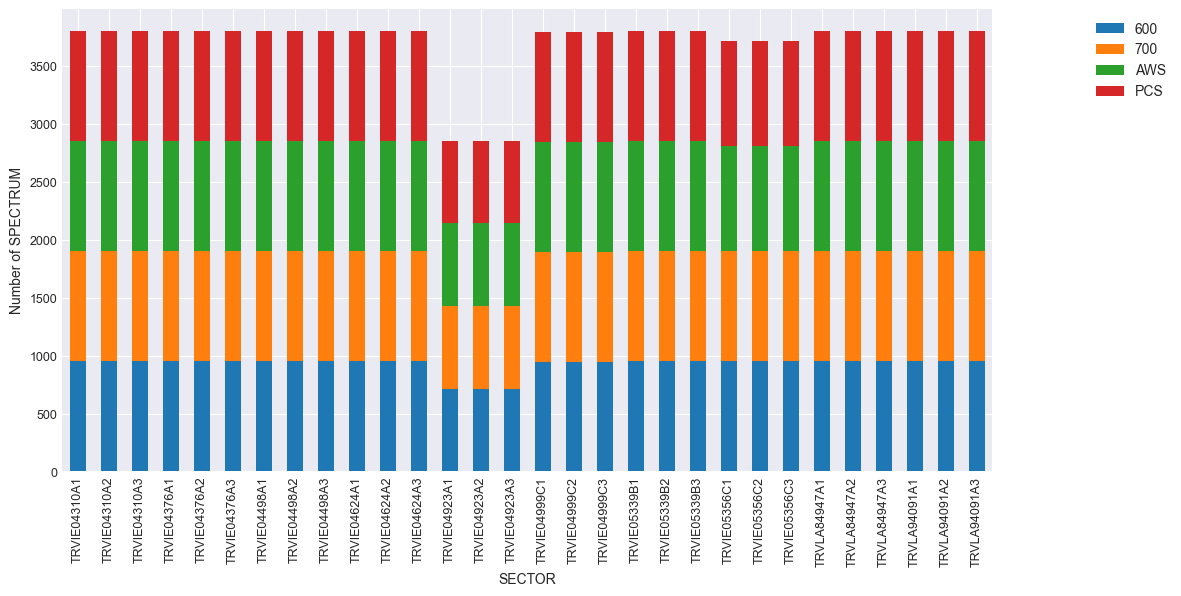

In [42]:
pd.crosstab(df.SECTOR,df.SPECTRUM).plot(kind='bar',stacked=True)
plt.ylabel('Number of SPECTRUM')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show();
# How many spectrum in a site ? is it covering 360 degree or not?

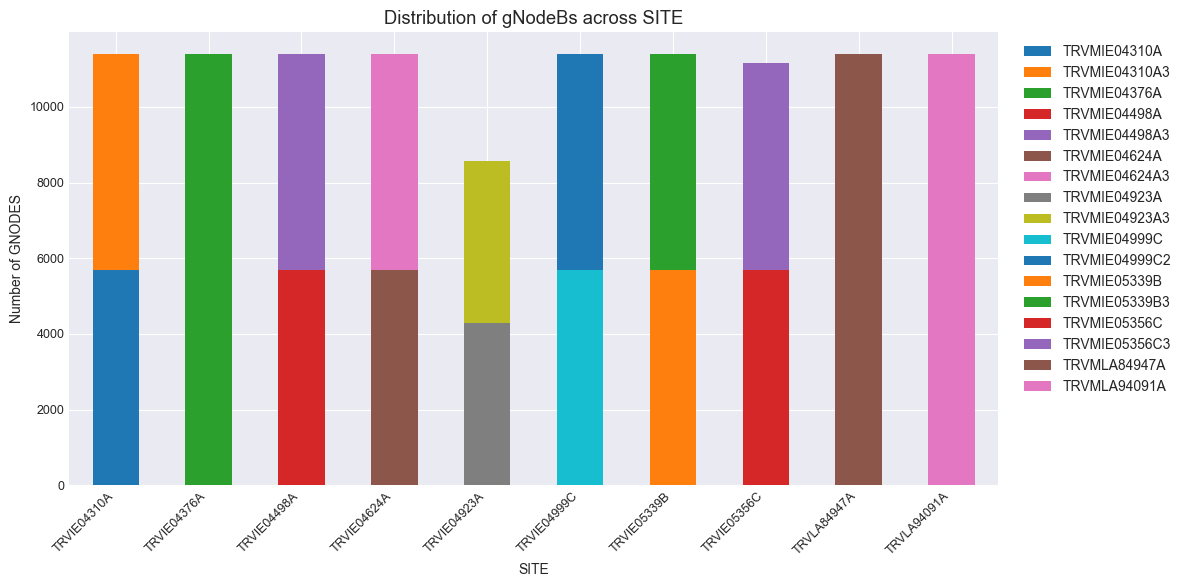

In [43]:
pd.crosstab(df.SITE,df.GNODEB).plot(kind='bar',stacked=True)
plt.ylabel('Number of GNODES')
plt.title('Distribution of gNodeBs across SITE')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show();

# how many GNODEB are there in each site

<Figure size 1200x600 with 0 Axes>

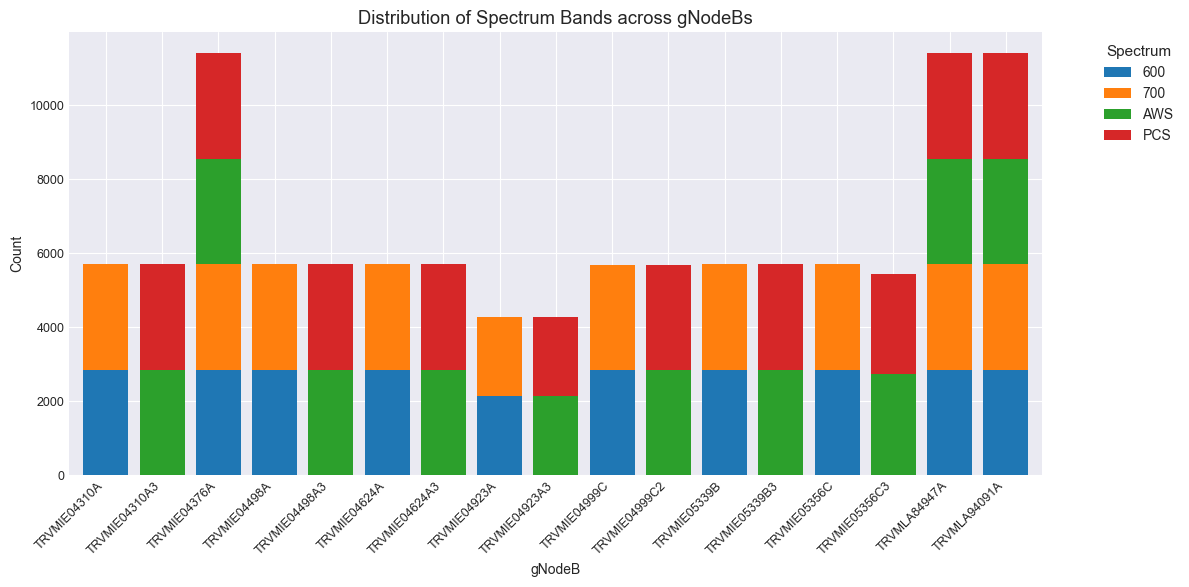

In [44]:
ct = pd.crosstab(df['GNODEB'], df['SPECTRUM'])

plt.figure(figsize=(12, 6))
ct.plot(kind='bar', width=0.8,stacked=True)
plt.title('Distribution of Spectrum Bands across gNodeBs')
plt.xlabel('gNodeB')
plt.ylabel('Count')
plt.legend(title='Spectrum', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show();
# how many spectrum each gnode has ?

In [45]:
df[['ERAB Drops eNodeB']].values.__contains__(0)
# df['ERAB Initial Access Failures (c)'].value_counts()
# df['RRC Failures'].value_counts()

True

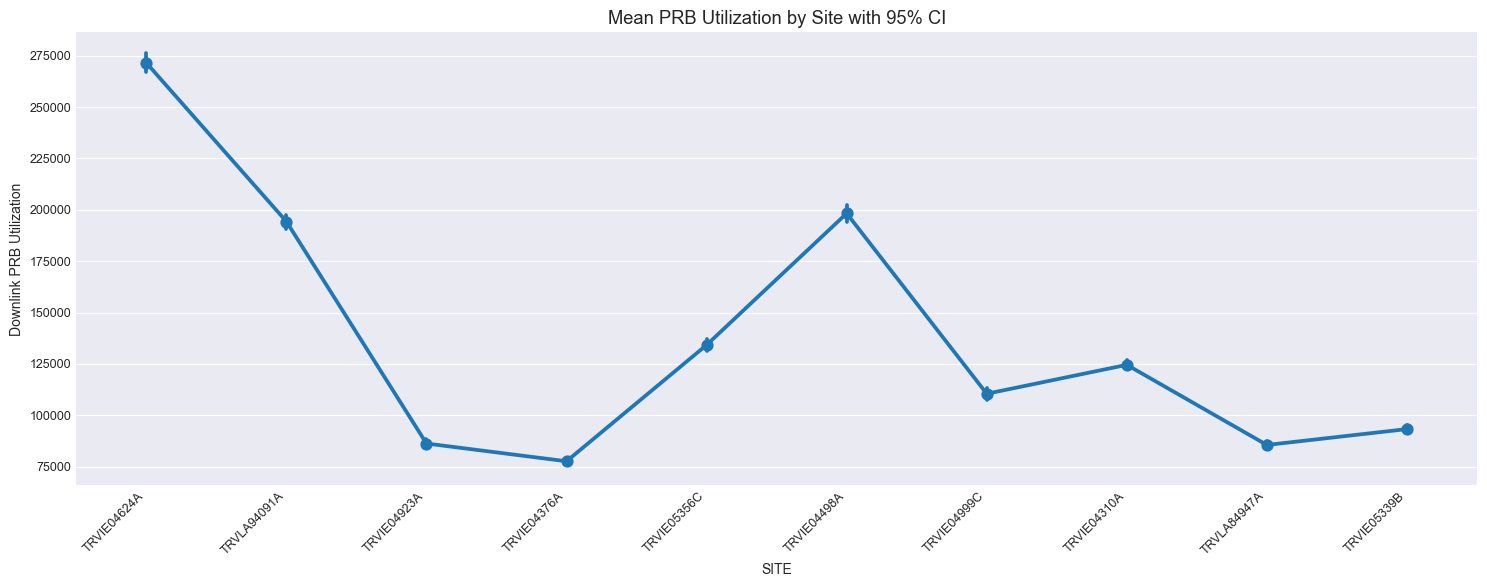

In [46]:
plt.figure(figsize=(15, 6))
sns.pointplot(data=df, x='SITE', estimator="sum", y='Downlink PRB Utilization')
plt.xticks(rotation=45, ha='right')
plt.title('Mean PRB Utilization by Site with 95% CI')
plt.tight_layout()
plt.show()
# try facet grid with site 

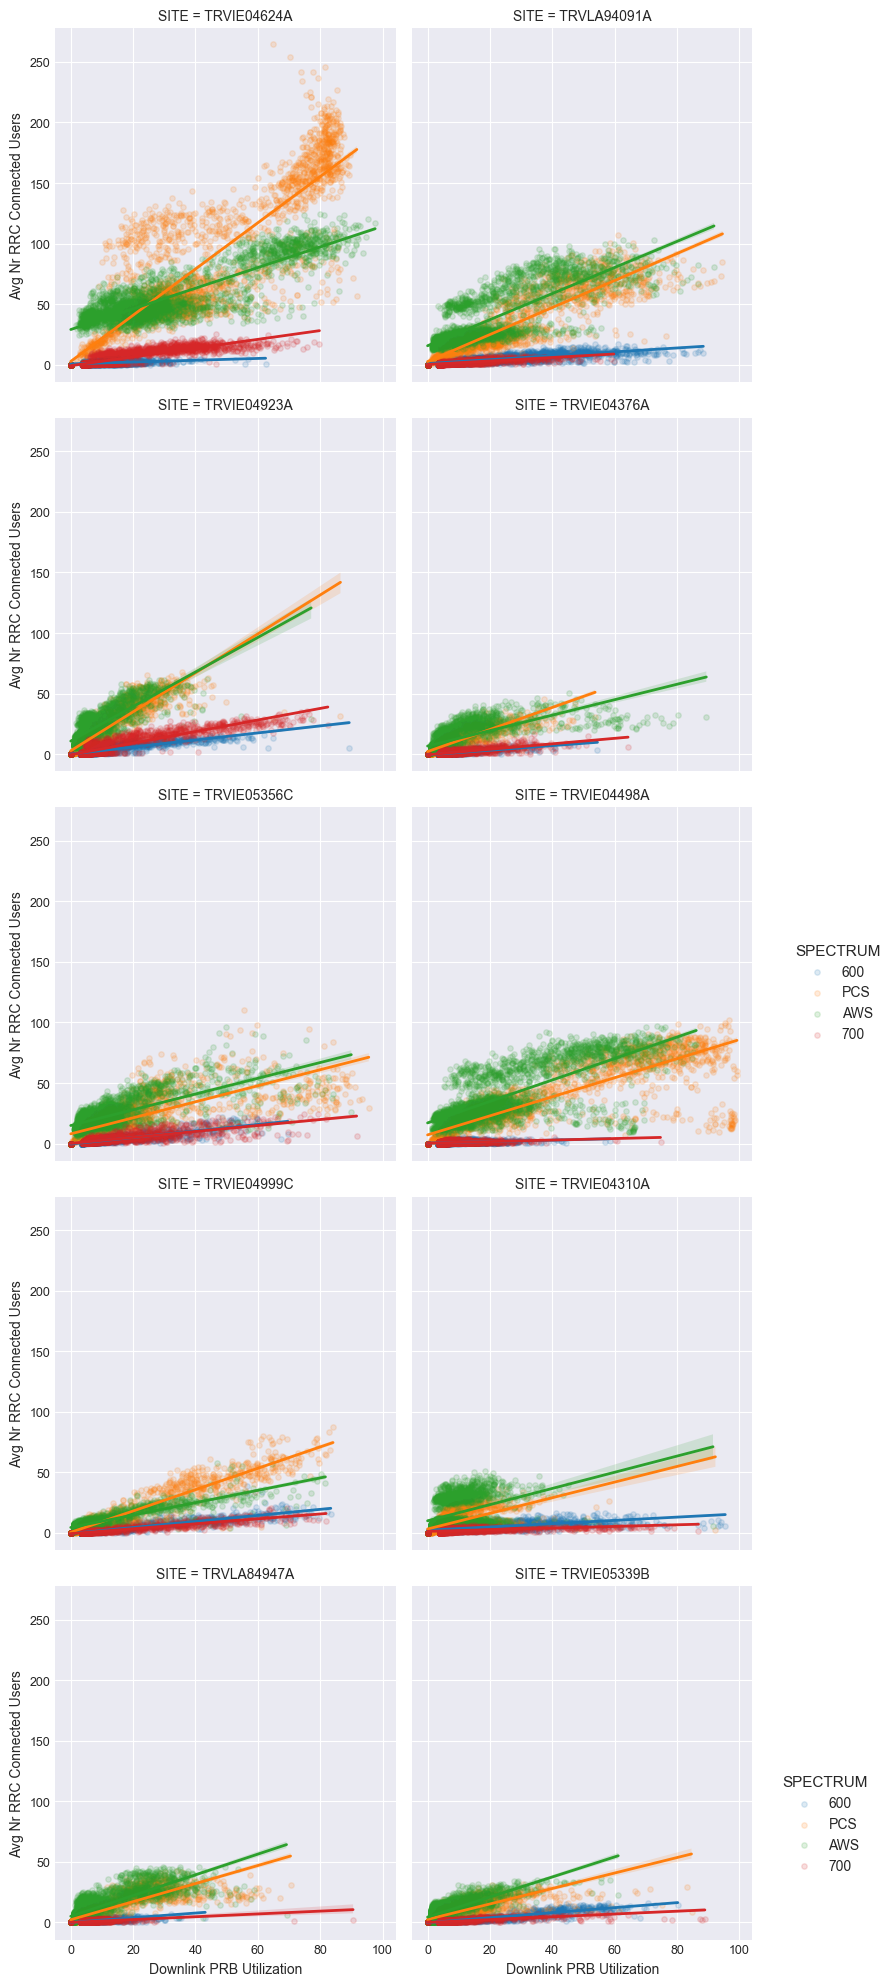

In [47]:
#sns.lmplot(data=df, x='Downlink PRB Utilization', y='Avg Nr RRC Connected Users',  hue='SPECTRUM', scatter_kws={'alpha':0.07, 's':15},line_kws={'linewidth':2});

sns.lmplot(data=df, 
           x='Downlink PRB Utilization',
           y='Avg Nr RRC Connected Users',  hue='SPECTRUM',
           col='SITE', col_wrap=2, height= 4,
           scatter_kws={'alpha':0.15, 's':15},
           line_kws={'linewidth':2})
plt.legend(title='SPECTRUM',bbox_to_anchor=(1.05, 0.5), loc='upper left')
plt.tight_layout()
plt.show();

# what is the relation between PRB Utilization and RRC Connected Users and their deistribution across sites?

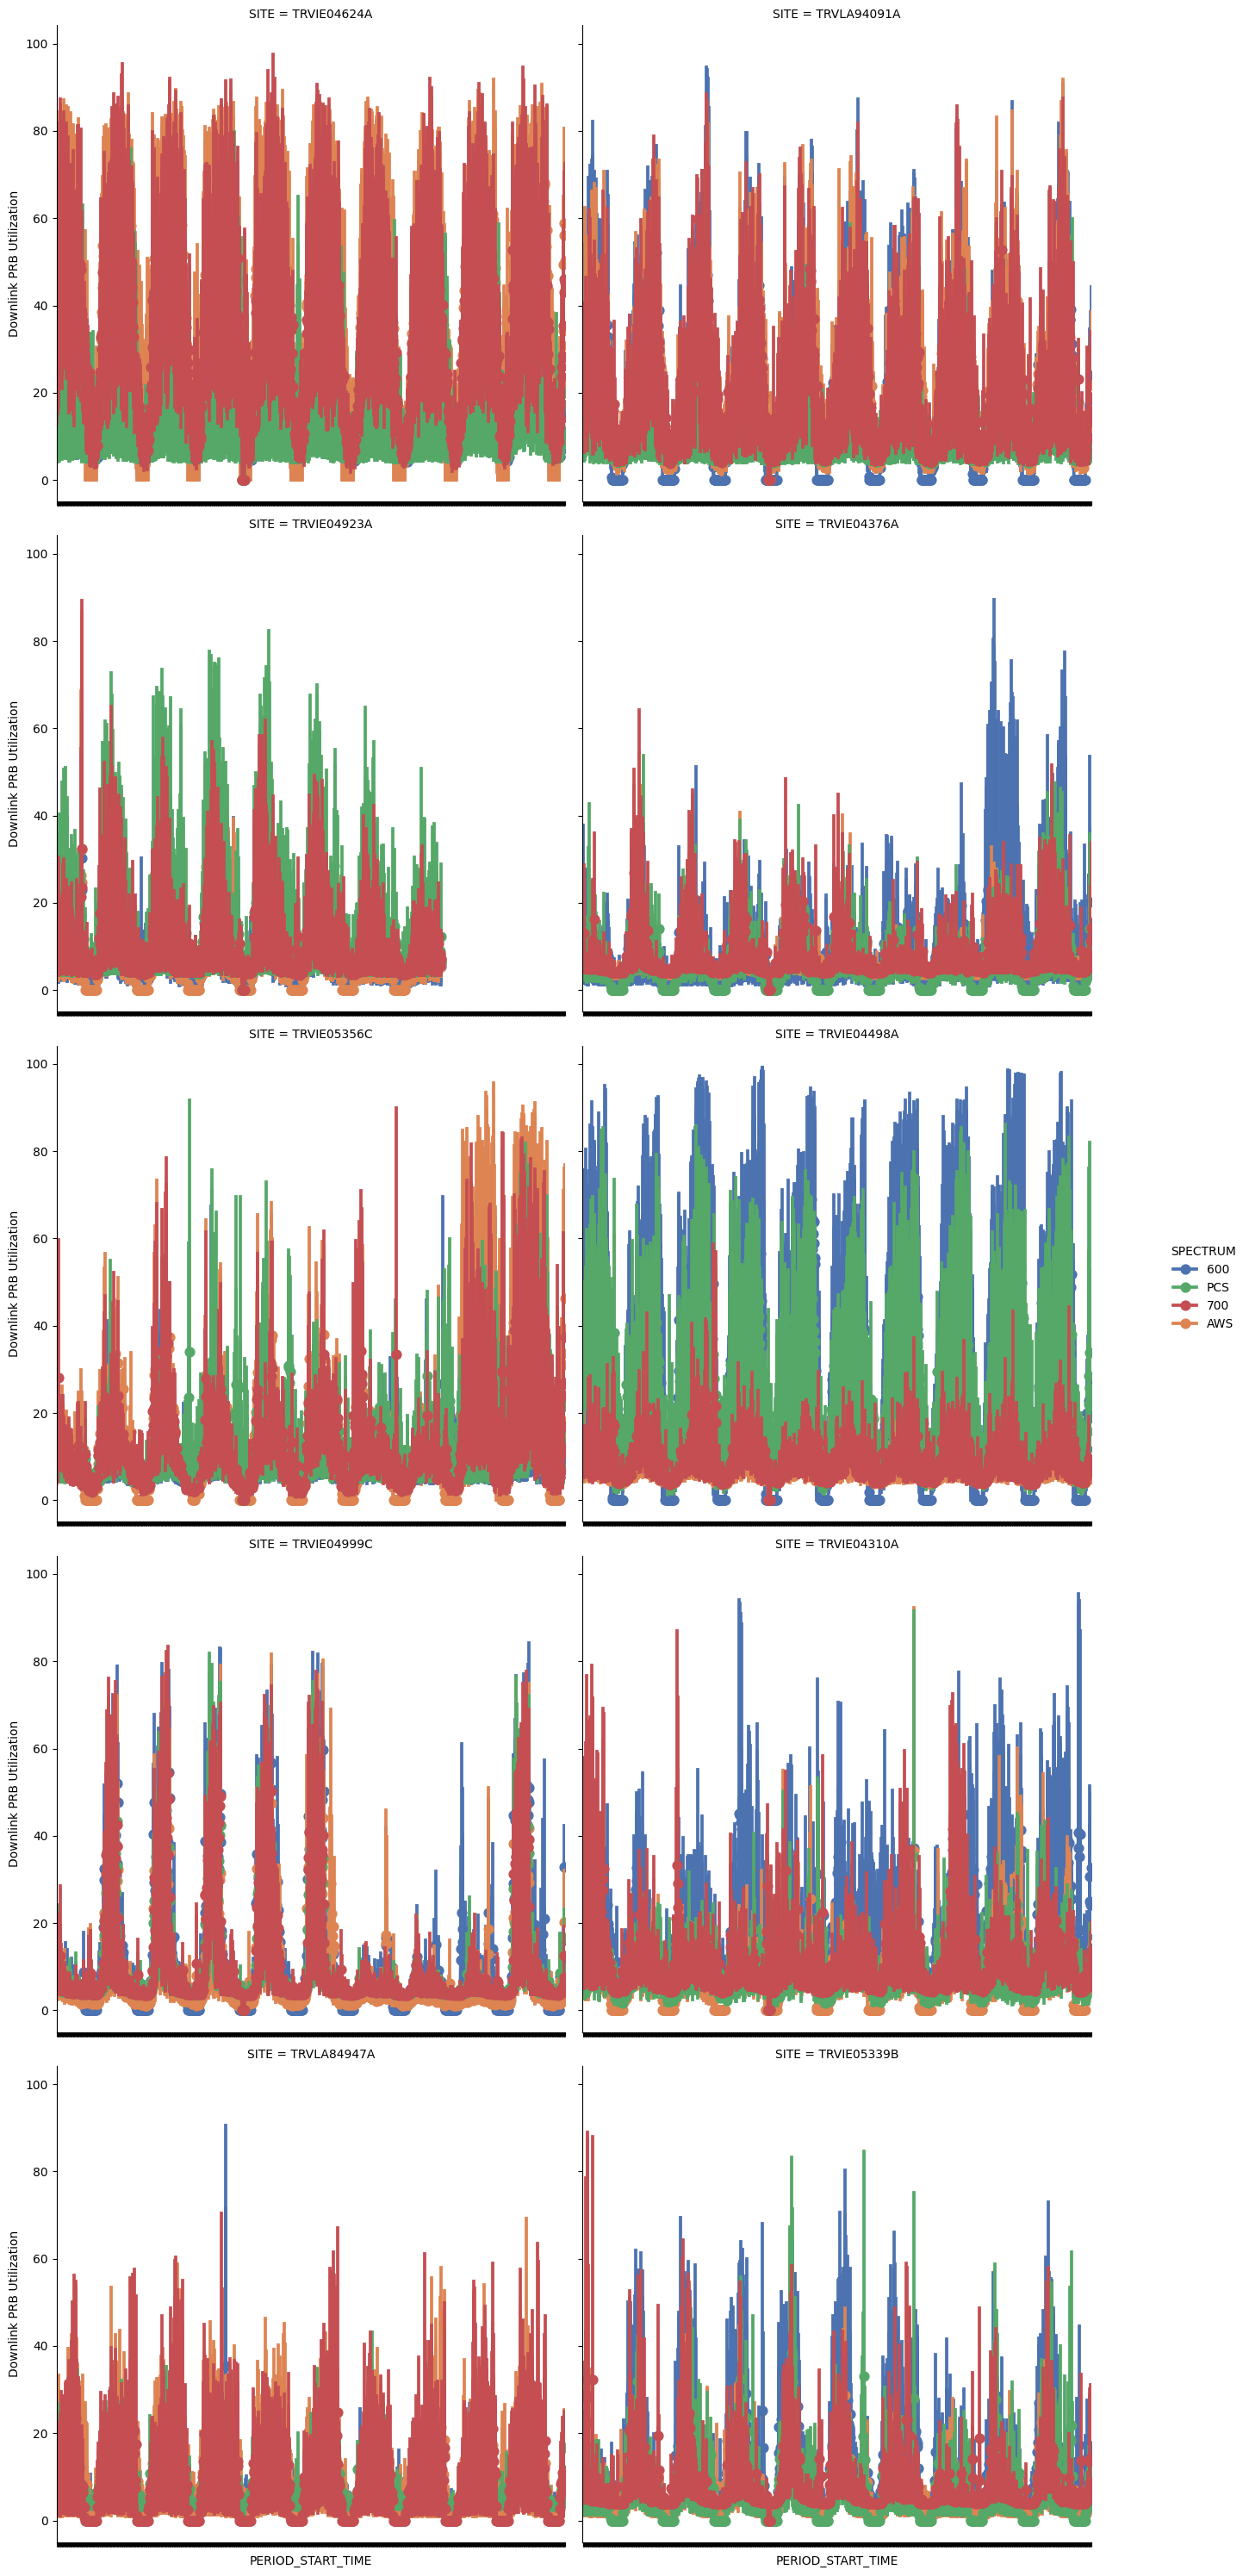

In [ ]:
plt.style.use('default') # time taking dont run if not required

# Facetgrid
g = sns.FacetGrid(df, col='SITE', col_wrap=2, height=6)
g.map_dataframe(sns.pointplot, 
    x='PERIOD_START_TIME', 
    y='Downlink PRB Utilization', 
    hue='SPECTRUM',
    palette='deep'  # Using default color palette
)

g.add_legend(title='SPECTRUM', bbox_to_anchor=(1.05, 0.5), loc='center left')

for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=45)
    ax.set_xticklabels(ax.get_xticklabels(), ha='right')


plt.tight_layout()
plt.show()

# how PRB utilization is distributed spectrum-wise at each site?

# clustering

In [82]:
# Import necessary libraries for clustering
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [83]:
# Create a copy of the dataframe for clustering
df_cluster = df.copy()

# Remove CELL and PERIOD_START_TIME columns as requested
columns_to_remove = ['CELL', 'PERIOD_START_TIME']
df_cluster = df_cluster.drop(columns=columns_to_remove)

print(f"Original shape: {df.shape}")
print(f"Clustering data shape after removing columns: {df_cluster.shape}")
print(f"\nRemaining columns:")
print(df_cluster.columns.tolist())

Original shape: (110904, 17)
Clustering data shape after removing columns: (110904, 15)

Remaining columns:
['SPECTRUM', 'SITE', 'GNODEB', 'SECTOR', 'Avg Nr RRC Connected Users', 'Downlink PRB Utilization', 'VoLTE Drop Rate (%)', 'ERAB Drop Rate eNodeB (%)', 'ERAB Drops eNodeB', 'ERAB Initial Access Failure Rate (%)', 'ERAB Initial Access Failures (c)', 'RRC Failures', 'RRC Failure Rate (%)', 'PRB_Util_Threshold', 'CELL_TYPE']


In [84]:
# Identify categorical and numerical columns
categorical_columns = df_cluster.select_dtypes(include=['object', 'bool']).columns.tolist()
numerical_columns = df_cluster.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Categorical columns ({len(categorical_columns)}): {categorical_columns}")
print(f"\nNumerical columns ({len(numerical_columns)}): {numerical_columns}")

# Display unique values for categorical columns
print("\n=== Unique values in categorical columns ===")
for col in categorical_columns:
    unique_vals = df_cluster[col].nunique()
    print(f"{col}: {unique_vals} unique values")
    if unique_vals <= 10:
        print(f"  Values: {df_cluster[col].unique()}")
    print()

Categorical columns (6): ['SPECTRUM', 'SITE', 'GNODEB', 'SECTOR', 'PRB_Util_Threshold', 'CELL_TYPE']

Numerical columns (9): ['Avg Nr RRC Connected Users', 'Downlink PRB Utilization', 'VoLTE Drop Rate (%)', 'ERAB Drop Rate eNodeB (%)', 'ERAB Drops eNodeB', 'ERAB Initial Access Failure Rate (%)', 'ERAB Initial Access Failures (c)', 'RRC Failures', 'RRC Failure Rate (%)']

=== Unique values in categorical columns ===
SPECTRUM: 4 unique values
  Values: ['600' 'PCS' 'AWS' '700']

SITE: 10 unique values
  Values: ['TRVIE04624A' 'TRVLA94091A' 'TRVIE04923A' 'TRVIE04376A' 'TRVIE05356C'
 'TRVIE04498A' 'TRVIE04999C' 'TRVIE04310A' 'TRVLA84947A' 'TRVIE05339B']

GNODEB: 17 unique values

SECTOR: 30 unique values

PRB_Util_Threshold: 2 unique values
  Values: [ True False]

CELL_TYPE: 2 unique values
  Values: ['coverage' 'capacity']



In [85]:
# Encode categorical columns and track the mappings
label_encoders = {}
encoding_mappings = {}

df_encoded = df_cluster.copy()

print("=== Encoding Categorical Variables ===")
for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_cluster[col])
    
    # Store the encoder and mapping
    label_encoders[col] = le
    encoding_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))
    
    print(f"\n{col}:")
    print(f"  Encoded {len(le.classes_)} unique values")
    
    # Show mapping for columns with reasonable number of unique values
    if len(le.classes_) <= 20:
        for original, encoded in encoding_mappings[col].items():
            print(f"  {original} -> {encoded}")
    else:
        print(f"  (Too many values to display - {len(le.classes_)} total)")
        # Show first few mappings
        items = list(encoding_mappings[col].items())[:5]
        for original, encoded in items:
            print(f"  {original} -> {encoded}")
        print(f"  ... and {len(le.classes_) - 5} more")

print(f"\nEncoded dataframe shape: {df_encoded.shape}")
print(f"All columns are now numerical: {df_encoded.dtypes.unique()}")

=== Encoding Categorical Variables ===

SPECTRUM:
  Encoded 4 unique values
  600 -> 0
  700 -> 1
  AWS -> 2
  PCS -> 3

SITE:
  Encoded 10 unique values
  TRVIE04310A -> 0
  TRVIE04376A -> 1
  TRVIE04498A -> 2
  TRVIE04624A -> 3
  TRVIE04923A -> 4
  TRVIE04999C -> 5
  TRVIE05339B -> 6
  TRVIE05356C -> 7
  TRVLA84947A -> 8
  TRVLA94091A -> 9

GNODEB:
  Encoded 17 unique values
  TRVMIE04310A -> 0
  TRVMIE04310A3 -> 1
  TRVMIE04376A -> 2
  TRVMIE04498A -> 3
  TRVMIE04498A3 -> 4
  TRVMIE04624A -> 5
  TRVMIE04624A3 -> 6
  TRVMIE04923A -> 7
  TRVMIE04923A3 -> 8
  TRVMIE04999C -> 9
  TRVMIE04999C2 -> 10
  TRVMIE05339B -> 11
  TRVMIE05339B3 -> 12
  TRVMIE05356C -> 13
  TRVMIE05356C3 -> 14
  TRVMLA84947A -> 15
  TRVMLA94091A -> 16

SECTOR:
  Encoded 30 unique values
  (Too many values to display - 30 total)
  TRVIE04310A1 -> 0
  TRVIE04310A2 -> 1
  TRVIE04310A3 -> 2
  TRVIE04376A1 -> 3
  TRVIE04376A2 -> 4
  ... and 25 more

PRB_Util_Threshold:
  Encoded 2 unique values
  False -> 0
  True -> 

In [86]:
# Normalize all data using MinMaxScaler
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(
    scaler.fit_transform(df_encoded),
    columns=df_encoded.columns,
    index=df_encoded.index
)

print("=== Data Normalization Complete ===")
print(f"Normalized data shape: {df_normalized.shape}")
print(f"\nData range after normalization:")
print(f"Min values: {df_normalized.min().min():.6f}")
print(f"Max values: {df_normalized.max().max():.6f}")

print(f"\nFirst few rows of normalized data:")
display(df_normalized.head())

print(f"\nNormalized data statistics:")
display(df_normalized.describe())

=== Data Normalization Complete ===
Normalized data shape: (110904, 15)

Data range after normalization:
Min values: 0.000000
Max values: 1.000000

First few rows of normalized data:


,SPECTRUM,SITE,GNODEB,SECTOR,Avg Nr RRC Connected Users,Downlink PRB Utilization,VoLTE Drop Rate (%),ERAB Drop Rate eNodeB (%),ERAB Drops eNodeB,ERAB Initial Access Failure Rate (%),ERAB Initial Access Failures (c),RRC Failures,RRC Failure Rate (%),PRB_Util_Threshold,CELL_TYPE
0,0.000,0.333,0.312,0.345,0.002,0.071,0.0,0.000,0.000,0.0,0.0,0.0,0.0,1.0,1.0
1,1.000,1.000,1.000,0.931,0.217,0.496,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.667,0.444,0.500,0.448,0.036,0.020,0.0,0.002,0.017,0.0,0.0,0.0,0.0,1.0,0.0
3,0.667,0.111,0.125,0.103,0.038,0.022,0.0,0.000,0.000,0.0,0.0,0.0,0.0,1.0,0.0
4,0.667,0.111,0.125,0.172,0.010,0.016,0.0,0.000,0.000,0.0,0.0,0.0,0.0,1.0,0.0



Normalized data statistics:


,SPECTRUM,SITE,GNODEB,SECTOR,Avg Nr RRC Connected Users,Downlink PRB Utilization,VoLTE Drop Rate (%),ERAB Drop Rate eNodeB (%),ERAB Drops eNodeB,ERAB Initial Access Failure Rate (%),ERAB Initial Access Failures (c),RRC Failures,RRC Failure Rate (%),PRB_Util_Threshold,CELL_TYPE
count,110904.000,110904.000,110904.000,110904.000,110904.000,110904.000,110904.000,1.109e+05,110904.000,110904.000,110904.000,110904.000,110904.000,110904.000,110904.000
mean,0.499,0.501,0.529,0.501,0.046,0.125,0.004,4.468e-03,0.019,0.006,0.005,0.008,0.001,0.823,0.501
std,0.373,0.323,0.333,0.302,0.081,0.153,0.046,2.415e-02,0.056,0.025,0.016,0.033,0.014,0.382,0.500
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000e+00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.222,0.188,0.241,0.002,0.039,0.000,0.000e+00,0.000,0.000,0.000,0.000,0.000,1.000,0.000
50%,0.333,0.556,0.562,0.517,0.012,0.065,0.000,0.000e+00,0.000,0.000,0.000,0.000,0.000,1.000,1.000
75%,0.667,0.778,0.875,0.759,0.055,0.148,0.000,9.785e-04,0.017,0.002,0.004,0.000,0.000,1.000,1.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000e+00,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [40]:
# Elbow Method - Within Sum of Squares (WSS) plot
print("=== Performing Elbow Method Analysis ===")

# Test different numbers of clusters
k_range = range(1, 11)
wss = []
silhouette_scores = []

print("Computing WSS and Silhouette scores for different k values...")
for k in k_range:
    print(f"Processing k={k}...", end=" ")
    
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_normalized)
    
    # Within Sum of Squares (Inertia)
    wss.append(kmeans.inertia_)
    
    # Silhouette Score (only for k > 1)
    if k > 1:
        sil_score = silhouette_score(df_normalized, kmeans.labels_)
        silhouette_scores.append(sil_score)
        print(f"WSS: {kmeans.inertia_:.2f}, Silhouette: {sil_score:.3f}")
    else:
        silhouette_scores.append(0)  # No silhouette score for k=1
        print(f"WSS: {kmeans.inertia_:.2f}")

print("\n=== Results Summary ===")
results_df = pd.DataFrame({
    'K': list(k_range),
    'WSS (Inertia)': wss,
    'Silhouette Score': silhouette_scores
})
display(results_df)

=== Performing Elbow Method Analysis ===
Computing WSS and Silhouette scores for different k values...
Processing k=1... WSS: 97478.89
Processing k=2... WSS: 56813.70, Silhouette: 0.426
Processing k=3... WSS: 43484.32, Silhouette: 0.402
Processing k=4... WSS: 30166.36, Silhouette: 0.442
Processing k=5... WSS: 21597.38, Silhouette: 0.500
Processing k=6... WSS: 16794.10, Silhouette: 0.525
Processing k=7... WSS: 13901.53, Silhouette: 0.547
Processing k=8... WSS: 12068.62, Silhouette: 0.515
Processing k=9... WSS: 10279.84, Silhouette: 0.472
Processing k=10... WSS: 8627.44, Silhouette: 0.482

=== Results Summary ===


,K,WSS (Inertia),Silhouette Score
0,1,97478.892,0.000
1,2,56813.700,0.426
2,3,43484.320,0.402
3,4,30166.361,0.442
4,5,21597.376,0.500
5,6,16794.096,0.525
6,7,13901.525,0.547
7,8,12068.615,0.515
8,9,10279.842,0.472
9,10,8627.444,0.482


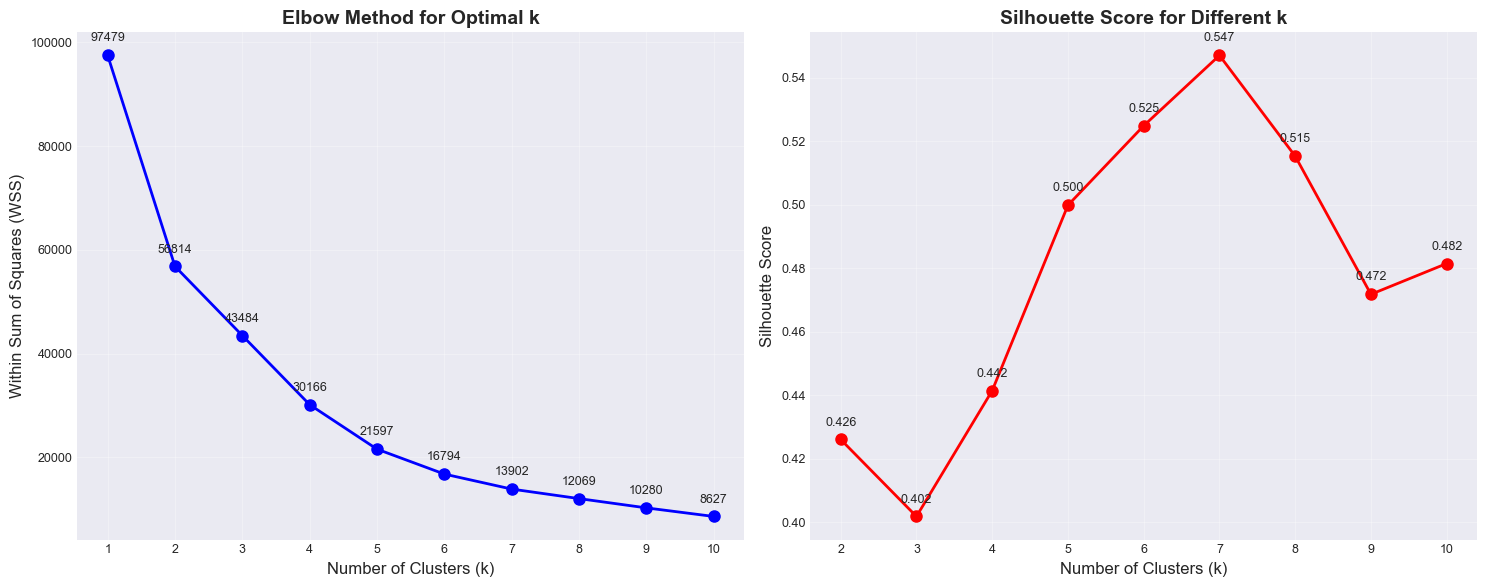


=== Optimal Cluster Analysis ===
Highest Silhouette Score: 0.547 at k=7

Recommendation: Based on silhouette analysis, k=7 appears optimal
However, also consider the elbow in the WSS plot for practical interpretation.


In [41]:
# Create plots for WSS (Elbow) and Silhouette scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# WSS (Elbow) Plot
ax1.plot(k_range, wss, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters (k)', fontsize=12)
ax1.set_ylabel('Within Sum of Squares (WSS)', fontsize=12)
ax1.set_title('Elbow Method for Optimal k', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(k_range)

# Add annotations for WSS values
for i, (k, w) in enumerate(zip(k_range, wss)):
    ax1.annotate(f'{w:.0f}', (k, w), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9)

# Silhouette Score Plot
k_range_sil = list(range(2, 11))  # Silhouette score starts from k=2
sil_scores_plot = silhouette_scores[1:]  # Remove the 0 for k=1

ax2.plot(k_range_sil, sil_scores_plot, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters (k)', fontsize=12)
ax2.set_ylabel('Silhouette Score', fontsize=12)
ax2.set_title('Silhouette Score for Different k', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xticks(k_range_sil)

# Add annotations for Silhouette scores
for i, (k, s) in enumerate(zip(k_range_sil, sil_scores_plot)):
    ax2.annotate(f'{s:.3f}', (k, s), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Find optimal k based on highest silhouette score
optimal_k_silhouette = k_range_sil[np.argmax(sil_scores_plot)]
max_silhouette = max(sil_scores_plot)

print(f"\n=== Optimal Cluster Analysis ===")
print(f"Highest Silhouette Score: {max_silhouette:.3f} at k={optimal_k_silhouette}")
print(f"\nRecommendation: Based on silhouette analysis, k={optimal_k_silhouette} appears optimal")
print(f"However, also consider the elbow in the WSS plot for practical interpretation.")

In [133]:
# Perform initial clustering with optimal k
optimal_k = 4 # optimal_k_silhouette  

print(f"=== Performing K-Means Clustering with k={optimal_k} ===")

# Fit K-means with optimal k
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10) 
cluster_labels = kmeans_final.fit_predict(df_normalized)

# Add cluster labels to original dataframe
df_clustered = df.copy()
df_clustered['Cluster'] = cluster_labels

# Calculate final metrics
final_wss = kmeans_final.inertia_
final_silhouette = silhouette_score(df_normalized, cluster_labels)

print(f"\n=== Clustering Results ===")
print(f"Number of clusters: {optimal_k}")
print(f"Final WSS (Inertia): {final_wss:.2f}")
print(f"Final Silhouette Score: {final_silhouette:.3f}")

# Cluster distribution
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
print(f"\n=== Cluster Distribution ===")
for cluster_id, count in cluster_counts.items():
    percentage = (count / len(cluster_labels)) * 100
    print(f"Cluster {cluster_id}: {count:,} samples ({percentage:.1f}%)")

print(f"\nClustered dataframe shape: {df_clustered.shape}")
display(df_clustered.head())

=== Performing K-Means Clustering with k=4 ===

=== Clustering Results ===
Number of clusters: 4
Final WSS (Inertia): 30166.36
Final Silhouette Score: 0.442

=== Cluster Distribution ===
Cluster 0: 28,494 samples (25.7%)
Cluster 1: 27,467 samples (24.8%)
Cluster 2: 27,859 samples (25.1%)
Cluster 3: 27,084 samples (24.4%)

Clustered dataframe shape: (110904, 18)


,PERIOD_START_TIME,SPECTRUM,SITE,GNODEB,SECTOR,CELL,Avg Nr RRC Connected Users,Downlink PRB Utilization,VoLTE Drop Rate (%),ERAB Drop Rate eNodeB (%),ERAB Drops eNodeB,ERAB Initial Access Failure Rate (%),ERAB Initial Access Failures (c),RRC Failures,RRC Failure Rate (%),PRB_Util_Threshold,CELL_TYPE,Cluster
0,08/24/2025 11:00,600,TRVIE04624A,TRVMIE04624A,TRVIE04624A2,TRVEIE04624A21,0.411,7.09,0.0,0.000,0,0.0,0,0,0.0,True,coverage,3
1,08/24/2025 11:00,PCS,TRVLA94091A,TRVMLA94091A,TRVLA94091A1,TRVBLA94091A11,57.261,49.19,0.0,0.000,0,0.0,0,0,0.0,False,capacity,1
2,08/24/2025 11:00,AWS,TRVIE04923A,TRVMIE04923A3,TRVIE04923A2,TRVLIE04923A21,9.628,1.98,0.0,0.192,1,0.0,0,0,0.0,True,capacity,2
3,08/24/2025 11:00,AWS,TRVIE04376A,TRVMIE04376A,TRVIE04376A1,TRVLIE04376A11,10.106,2.21,0.0,0.000,0,0.0,0,0,0.0,True,capacity,2
4,08/24/2025 11:00,AWS,TRVIE04376A,TRVMIE04376A,TRVIE04376A3,TRVLIE04376A31,2.539,1.62,0.0,0.000,0,0.0,0,0,0.0,True,capacity,2


In [ ]:
df_clustered = df_clustered[df_clustered['CELL_TYPE']=='capacity']

,PERIOD_START_TIME,SPECTRUM,SITE,GNODEB,SECTOR,CELL,Avg Nr RRC Connected Users,Downlink PRB Utilization,VoLTE Drop Rate (%),ERAB Drop Rate eNodeB (%),ERAB Drops eNodeB,ERAB Initial Access Failure Rate (%),ERAB Initial Access Failures (c),RRC Failures,RRC Failure Rate (%),PRB_Util_Threshold,CELL_TYPE,Cluster
1,08/24/2025 11:00,PCS,TRVLA94091A,TRVMLA94091A,TRVLA94091A1,TRVBLA94091A11,57.261,49.19,0.0,0.000,0,0.000,0,0,0.0,False,capacity,1
2,08/24/2025 11:00,AWS,TRVIE04923A,TRVMIE04923A3,TRVIE04923A2,TRVLIE04923A21,9.628,1.98,0.0,0.192,1,0.000,0,0,0.0,True,capacity,2
3,08/24/2025 11:00,AWS,TRVIE04376A,TRVMIE04376A,TRVIE04376A1,TRVLIE04376A11,10.106,2.21,0.0,0.000,0,0.000,0,0,0.0,True,capacity,2
4,08/24/2025 11:00,AWS,TRVIE04376A,TRVMIE04376A,TRVIE04376A3,TRVLIE04376A31,2.539,1.62,0.0,0.000,0,0.000,0,0,0.0,True,capacity,2
6,08/24/2025 11:00,PCS,TRVIE04498A,TRVMIE04498A3,TRVIE04498A2,TRVBIE04498A21,30.228,23.59,0.0,0.000,0,0.000,0,0,0.0,False,capacity,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110887,09-03-2025 08:15,PCS,TRVIE04310A,TRVMIE04310A3,TRVIE04310A3,TRVBIE04310A31,8.089,10.51,0.0,0.328,1,0.000,0,0,0.0,True,capacity,2
110889,09-03-2025 08:15,PCS,TRVIE04310A,TRVMIE04310A3,TRVIE04310A1,TRVBIE04310A11,5.533,3.12,0.0,0.000,0,0.508,2,0,0.0,True,capacity,2
110890,09-03-2025 08:15,PCS,TRVIE04498A,TRVMIE04498A3,TRVIE04498A3,TRVBIE04498A31,59.889,42.92,0.0,0.138,4,0.385,11,0,0.0,False,capacity,2
110891,09-03-2025 08:15,PCS,TRVIE04310A,TRVMIE04310A3,TRVIE04310A2,TRVBIE04310A21,19.761,13.46,0.0,0.000,0,0.203,2,0,0.0,True,capacity,2


In [135]:
# Analyze cluster characteristics
print("=== Cluster Characteristics Analysis ===")

# Numerical features analysis by cluster
numerical_features = ['Avg Nr RRC Connected Users', 'Downlink PRB Utilization', 
                     'VoLTE Drop Rate (%)', 'ERAB Drop Rate eNodeB (%)', 
                     'ERAB Drops eNodeB', 'ERAB Initial Access Failure Rate (%)',
                     'ERAB Initial Access Failures (c)', 'RRC Failures', 'RRC Failure Rate (%)']

cluster_summary = df_clustered.groupby('Cluster')[numerical_features].agg(['mean', 'std', 'median']).round(3)

print("\nNumerical Features by Cluster (Mean values):")
display(cluster_summary.xs('mean', level=1, axis=1))

# Categorical features analysis by cluster
print("\n=== Categorical Features Distribution by Cluster ===")
categorical_features = ['SPECTRUM', 'SITE', 'GNODEB', 'SECTOR']

for feature in categorical_features:
    print(f"\n{feature} distribution by cluster:")
    crosstab = pd.crosstab(df_clustered['Cluster'], df_clustered[feature], normalize='index') * 100
    display(crosstab.round(1))

=== Cluster Characteristics Analysis ===

Numerical Features by Cluster (Mean values):


,Avg Nr RRC Connected Users,Downlink PRB Utilization,VoLTE Drop Rate (%),ERAB Drop Rate eNodeB (%),ERAB Drops eNodeB,ERAB Initial Access Failure Rate (%),ERAB Initial Access Failures (c),RRC Failures,RRC Failure Rate (%)
Cluster,,,,,,,,,
0,1.950,10.139,0.674,1.127,1.588,1.029,1.572,0.305,0.302
1,15.377,10.813,0.168,0.107,0.732,0.154,1.138,0.254,0.056
2,28.691,18.019,0.089,0.050,1.003,0.090,1.398,0.188,0.031
3,2.424,10.651,0.544,0.485,1.207,0.713,1.673,0.400,0.123



=== Categorical Features Distribution by Cluster ===

SPECTRUM distribution by cluster:


SPECTRUM,600,700,AWS,PCS
Cluster,,,,
0,50.0,50.0,0.0,0.0
1,0.0,0.0,50.2,49.8
2,0.0,0.0,49.8,50.2
3,50.0,50.0,0.0,0.0



SITE distribution by cluster:


SITE,TRVIE04310A,TRVIE04376A,TRVIE04498A,TRVIE04624A,TRVIE04923A,TRVIE04999C,TRVIE05339B,TRVIE05356C,TRVLA84947A,TRVLA94091A
Cluster,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,20.0,20.0,20.0
1,0.0,0.0,0.0,0.0,0.0,17.9,20.8,19.8,20.8,20.8
2,20.5,20.5,20.5,20.5,15.4,2.8,0.0,0.0,0.0,0.0
3,21.0,21.0,21.0,21.0,15.8,0.0,0.0,0.0,0.0,0.0



GNODEB distribution by cluster:


GNODEB,TRVMIE04310A,TRVMIE04310A3,TRVMIE04376A,TRVMIE04498A,TRVMIE04498A3,TRVMIE04624A,TRVMIE04624A3,TRVMIE04923A,TRVMIE04923A3,TRVMIE04999C,TRVMIE04999C2,TRVMIE05339B,TRVMIE05339B3,TRVMIE05356C,TRVMIE05356C3,TRVMLA84947A,TRVMLA94091A
Cluster,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,20.0,0.0,20.0,0.0,20.0,20.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.9,0.0,20.8,0.0,19.8,20.8,20.8
2,0.0,20.5,20.5,0.0,20.5,0.0,20.5,0.0,15.4,0.0,2.8,0.0,0.0,0.0,0.0,0.0,0.0
3,21.0,0.0,21.0,21.0,0.0,21.0,0.0,15.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



SECTOR distribution by cluster:


SECTOR,TRVIE04310A1,TRVIE04310A2,TRVIE04310A3,TRVIE04376A1,TRVIE04376A2,TRVIE04376A3,TRVIE04498A1,TRVIE04498A2,TRVIE04498A3,TRVIE04624A1,TRVIE04624A2,TRVIE04624A3,TRVIE04923A1,TRVIE04923A2,TRVIE04923A3,TRVIE04999C1,TRVIE04999C2,TRVIE04999C3,TRVIE05339B1,TRVIE05339B2,TRVIE05339B3,TRVIE05356C1,TRVIE05356C2,TRVIE05356C3,TRVLA84947A1,TRVLA84947A2,TRVLA84947A3,TRVLA94091A1,TRVLA94091A2,TRVLA94091A3
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.7,6.7,6.7,6.7,6.7,6.7,6.7,6.7,6.7,6.7,6.7,6.7,6.7,6.7,6.7
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.6,5.5,6.8,6.9,6.9,6.9,6.6,6.6,6.6,6.9,6.9,6.9,6.9,6.9,6.9
2,6.8,6.8,6.8,6.8,6.8,6.8,6.8,6.8,6.8,6.8,6.8,6.8,5.1,5.1,5.1,1.3,1.4,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,5.3,5.3,5.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


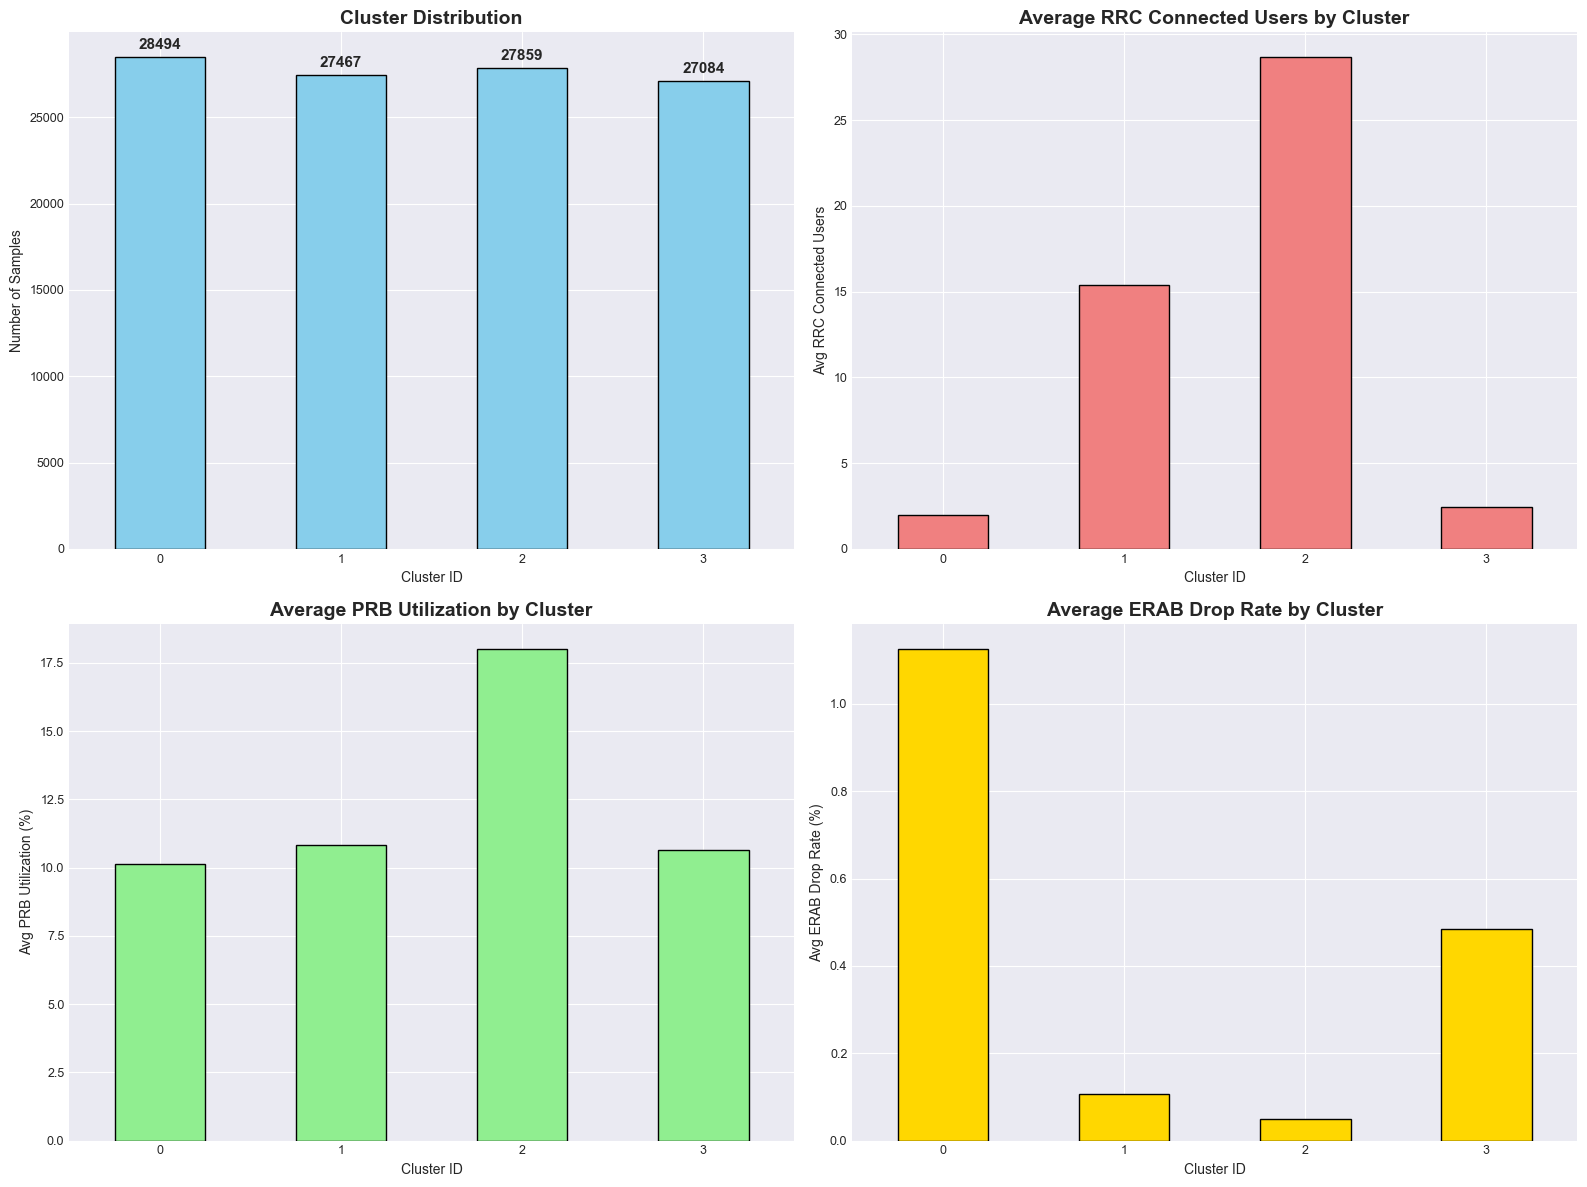


=== Clustering Analysis Complete ===
Successfully created 4 clusters from 110,904 data points
Silhouette Score: 0.442 (Higher is better, max = 1.0)

The clusters can help identify different network performance patterns and cell behaviors.


In [89]:
# Visualize clusters
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Cluster distribution
cluster_counts.plot(kind='bar', ax=axes[0,0], color='skyblue', edgecolor='black')
axes[0,0].set_title('Cluster Distribution', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Cluster ID')
axes[0,0].set_ylabel('Number of Samples')
axes[0,0].tick_params(axis='x', rotation=0)

# Add count labels on bars
for i, v in enumerate(cluster_counts.values):
    axes[0,0].text(i, v + max(cluster_counts.values)*0.01, str(v), 
                   ha='center', va='bottom', fontweight='bold')

# Plot 2: Average RRC Users by Cluster
avg_users = df_clustered.groupby('Cluster')['Avg Nr RRC Connected Users'].mean()
avg_users.plot(kind='bar', ax=axes[0,1], color='lightcoral', edgecolor='black')
axes[0,1].set_title('Average RRC Connected Users by Cluster', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Cluster ID')
axes[0,1].set_ylabel('Avg RRC Connected Users')
axes[0,1].tick_params(axis='x', rotation=0)

# Plot 3: PRB Utilization by Cluster
avg_prb = df_clustered.groupby('Cluster')['Downlink PRB Utilization'].mean()
avg_prb.plot(kind='bar', ax=axes[1,0], color='lightgreen', edgecolor='black')
axes[1,0].set_title('Average PRB Utilization by Cluster', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Cluster ID')
axes[1,0].set_ylabel('Avg PRB Utilization (%)')
axes[1,0].tick_params(axis='x', rotation=0)

# Plot 4: ERAB Drop Rate by Cluster
avg_erab = df_clustered.groupby('Cluster')['ERAB Drop Rate eNodeB (%)'].mean()
avg_erab.plot(kind='bar', ax=axes[1,1], color='gold', edgecolor='black')
axes[1,1].set_title('Average ERAB Drop Rate by Cluster', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Cluster ID')
axes[1,1].set_ylabel('Avg ERAB Drop Rate (%)')
axes[1,1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

print("\n=== Clustering Analysis Complete ===")
print(f"Successfully created {optimal_k} clusters from {len(df_clustered):,} data points")
print(f"Silhouette Score: {final_silhouette:.3f} (Higher is better, max = 1.0)")
print(f"\nThe clusters can help identify different network performance patterns and cell behaviors.")

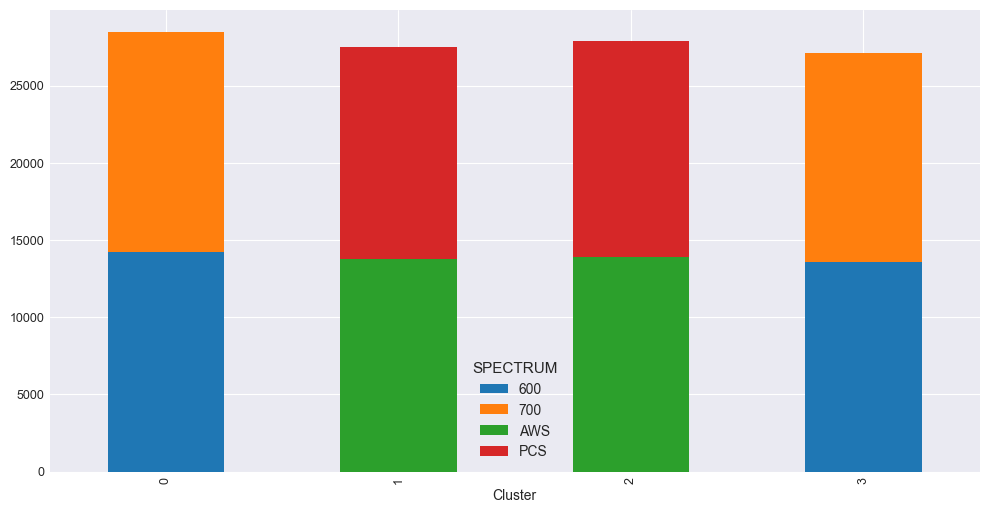

In [90]:
pd.crosstab(df_clustered['Cluster'], df_clustered['SPECTRUM']).plot(kind='bar', stacked=True)
plt.show();


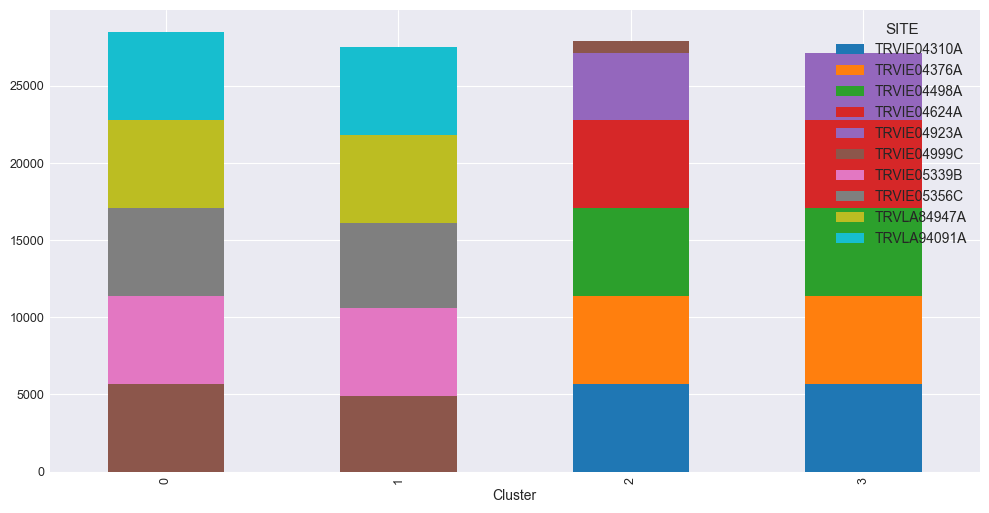

In [92]:
pd.crosstab(df_clustered['Cluster'], df_clustered[ 'SITE']).plot(kind='bar', stacked=True)
plt.show();


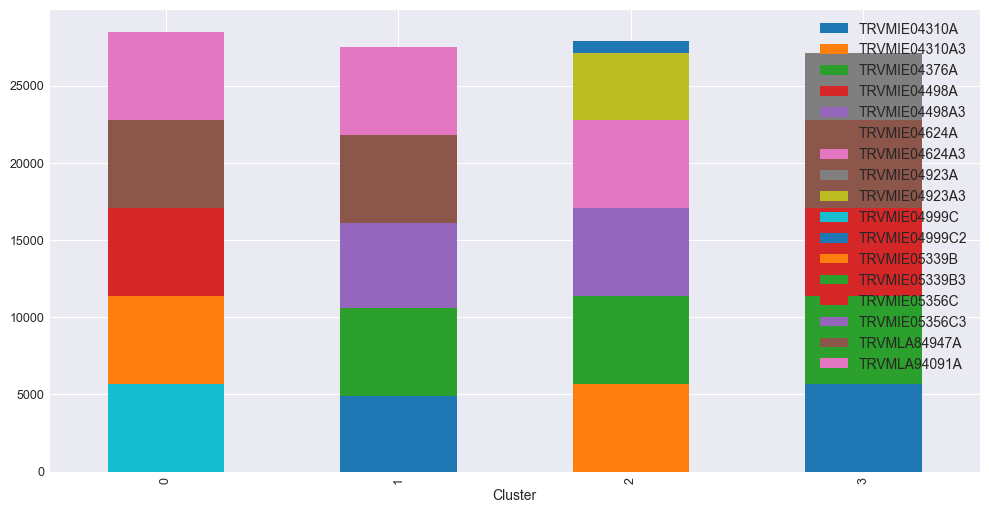

In [91]:
pd.crosstab(df_clustered['Cluster'], df_clustered['GNODEB']).plot(kind='bar',stacked=True)
plt.legend(loc='best')
plt.show();


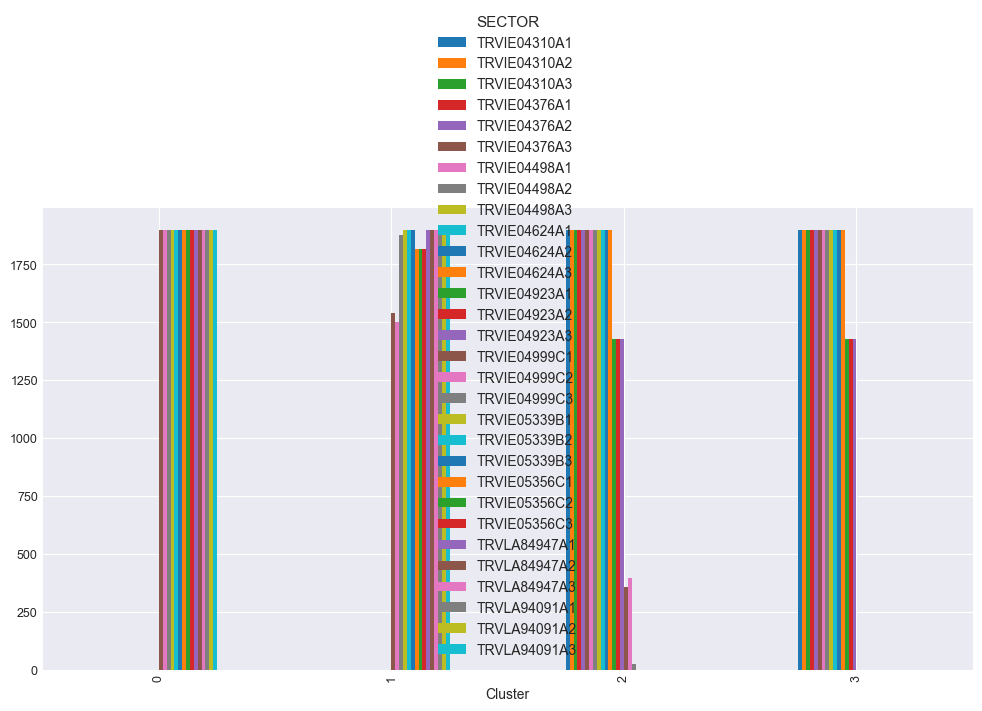

In [93]:
pd.crosstab(df_clustered['Cluster'], df_clustered['SECTOR']).plot(kind='bar')
plt.show();

<Figure size 1000x1500 with 0 Axes>

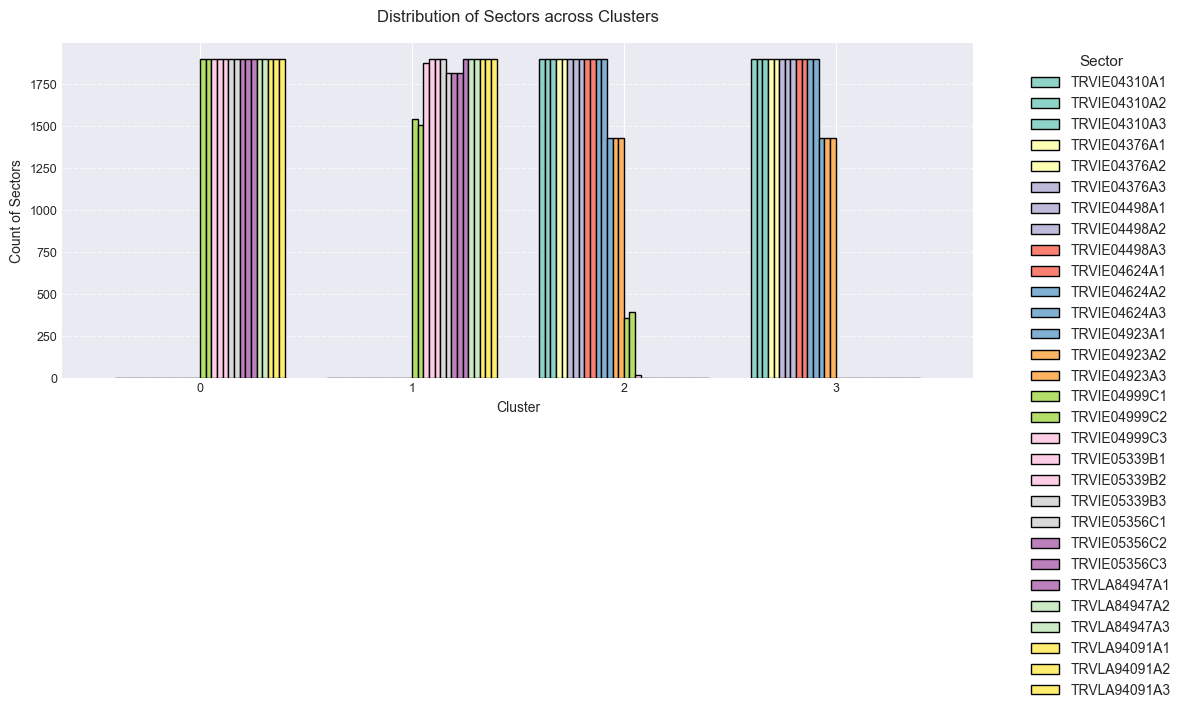

In [95]:
# Create crosstab with improved visualization
plt.figure(figsize=(10, 15))
pd.crosstab(df_clustered['Cluster'], df_clustered['SECTOR']).plot(
    kind='bar',
    width=0.8,
    colormap='Set3',  # Use a distinct colormap
    edgecolor='black',
    linewidth=1
)

# Customize the plot
plt.title('Distribution of Sectors across Clusters', fontsize=12, pad=15)
plt.xlabel('Cluster', fontsize=10)
plt.ylabel('Count of Sectors', fontsize=10)
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Add value labels on top of bars
# for container in plt.gca().containers:
#     plt.bar_label(container, padding=3, fmt='%.0f')

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

In [106]:
df.head()

,PERIOD_START_TIME,SPECTRUM,SITE,GNODEB,SECTOR,CELL,Avg Nr RRC Connected Users,Downlink PRB Utilization,VoLTE Drop Rate (%),ERAB Drop Rate eNodeB (%),ERAB Drops eNodeB,ERAB Initial Access Failure Rate (%),ERAB Initial Access Failures (c),RRC Failures,RRC Failure Rate (%),PRB_Util_Threshold,CELL_TYPE
0,08/24/2025 11:00,600,TRVIE04624A,TRVMIE04624A,TRVIE04624A2,TRVEIE04624A21,0.411,7.09,0.0,0.000,0,0.0,0,0,0.0,True,coverage
1,08/24/2025 11:00,PCS,TRVLA94091A,TRVMLA94091A,TRVLA94091A1,TRVBLA94091A11,57.261,49.19,0.0,0.000,0,0.0,0,0,0.0,False,capacity
2,08/24/2025 11:00,AWS,TRVIE04923A,TRVMIE04923A3,TRVIE04923A2,TRVLIE04923A21,9.628,1.98,0.0,0.192,1,0.0,0,0,0.0,True,capacity
3,08/24/2025 11:00,AWS,TRVIE04376A,TRVMIE04376A,TRVIE04376A1,TRVLIE04376A11,10.106,2.21,0.0,0.000,0,0.0,0,0,0.0,True,capacity
4,08/24/2025 11:00,AWS,TRVIE04376A,TRVMIE04376A,TRVIE04376A3,TRVLIE04376A31,2.539,1.62,0.0,0.000,0,0.0,0,0,0.0,True,capacity


In [137]:
#df_clustered[df_clustered['Cluster']==0]
df_clustered[df_clustered['CELL_TYPE']=='capacity'].groupby(['SITE'])['Cluster'].median().to_frame() #,'GNODEB','SECTOR','CELL'

,Cluster
SITE,
TRVIE04310A,2.0
TRVIE04376A,2.0
TRVIE04498A,2.0
TRVIE04624A,2.0
TRVIE04923A,2.0
TRVIE04999C,1.0
TRVIE05339B,1.0
TRVIE05356C,1.0
TRVLA84947A,1.0
